# <center><span style="color:#FF7F50"><u> SDA - Projet 4 Classification :</u><br><br>Prédire le parti victorieux de chaque Etat US aux élections de 2020<br><br>*Anne & Julie*
***

## <span style="color:#191970"> Objectif :</span>
L’objectif de ce projet est de prédire le parti gagnant des élections présidentielles de 2020 aux Etats-
Unis à partir de données socio-démographiques. Il s’agit donc d’un projet de classification binaire.<br><br>

## <span style="color:#191970">Import des packages</span>

In [ ]:
pip install missingno

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

## <span style="color:#191970">1. Import des données</span>

#### <span style="color:#191970">Ensemble des données démographiques</span>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#si pas de dossier data dans dossier projet
path = 'C:\\Users\\VIVAN Sabrina\\OneDrive\\Bureau\\Julie\\SDA\\Projets\\Projet4_Classification\\data\\'
os.chdir(path)
df1= pd.read_excel(path + 'Education.xls', skiprows=4)
df2= pd.read_excel(path + 'PopulationEstimates.xls', skiprows = 2)
df3 = pd.read_excel(path + 'PovertyEstimates.xls', skiprows = 4)
df4 = pd.read_excel(path + 'Unemployment.xls', skiprows=4)

In [5]:
#si dossier data avec fichiers sources dans dossier projet
#df1= pd.read_excel('./data/Education.xls', skiprows=4)
#df2= pd.read_excel("./data/PopulationEstimates.xls", skiprows = 2)
#df3 = pd.read_excel("./data/PovertyEstimates.xls", skiprows = 4)
#df4 = pd.read_excel("./data/Unemployment.xls", skiprows=4)

In [6]:
print(f"Le DF1:Education fait {df1.shape[0]} lignes et {df1.shape[1]} colonnes")
print(f"Le DF2:PopulationEstimates fait {df2.shape[0]} lignes et {df2.shape[1]} colonnes")
print(f"Le DF3:PovertyEstimates fait {df3.shape[0]} lignes et {df3.shape[1]} colonnes")
print(f"Le DF4:Unemployment fait {df4.shape[0]} lignes et {df4.shape[1]} colonnes")

Le DF1:Education fait 3283 lignes et 47 colonnes
Le DF2:PopulationEstimates fait 3273 lignes et 165 colonnes
Le DF3:PovertyEstimates fait 3193 lignes et 34 colonnes
Le DF4:Unemployment fait 3275 lignes et 88 colonnes


In [7]:
df1.head(3)

FIPS Code State       Area name  2003 Rural-urban Continuum Code  \
0          0    US   United States                              NaN   
1       1000    AL         Alabama                              NaN   
2       1001    AL  Autauga County                              2.0   

   2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   

   2013 Urban Influence Code  Less than a high school diploma, 1970  \
0                        NaN                             52373312.0   
1                        NaN                              1062306.0   
2                        2.0                                 6611.0   

   High school diploma only, 1970  Some college (1-3 years), 1970  \
0                      34158051.0                      11650730.0   
1                        468269.0                        136287.0   
2                          3757.0                           933.0   

   Four years of college or higher, 1970  \
0                             11717266.0   
1                               141936.0   
2                                  767.0   

   Percent of adults with less than a high school diploma, 1970  \
0                                               47.7              
1                                               58.7              
2                                               54.8              

   Percent of adults with a high school diploma only, 1970  \
0                                               31.1         
1                                               25.9         
2                                               31.1         

   Percent of adults completing some college (1-3 years), 1970  \
0                                               10.6             
1                                                7.5             
2                                                7.7             

   Percent of adults completing four years of college or higher, 1970  \
0                                               10.7                    
1                                                7.8                    
2                                                6.4                    

   Less than a high school diploma, 1980  High school diploma only, 1980  \
0                             44535197.0                      45947035.0   
1                               964840.0                        704207.0   
2                                 7074.0                          6145.0   

   Some college (1-3 years), 1980  Four years of college or higher, 1980  \
0                      20794975.0                             21558480.0   
1                        278205.0                               270063.0   
2                          2104.0                                 2117.0   

   Percent of adults with less than a high school diploma, 1980  \
0                                               33.5              
1                                               43.5              
2                                               40.6              

   Percent of adults with a high school diploma only, 1980  \
0                                               34.6         
1                                               31.8         
2                                               35.2         

   Percent of adults completing some college (1-3 years), 1980  \
0                                               15.7             
1                                               12.5             
2                                               12.1             

   Percent of adults completing four years of college or higher, 1980  \
0                                               16.2                    
1                                               12.2                    
2                             

In [8]:
df2.head(3)

FIPStxt State       Area_Name  Rural-urban_Continuum Code_2003  \
0        0    US   United States                              NaN   
1     1000    AL         Alabama                              NaN   
2     1001    AL  Autauga County                              2.0   

   Rural-urban_Continuum Code_2013  Urban_Influence_Code_2003  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              2.0                        2.0   

   Urban_Influence_Code_2013  Economic_typology_2015  CENSUS_2010_POP  \
0                        NaN                     NaN        308745538   
1                        NaN                     NaN          4779736   
2                        2.0                     0.0            54571   

   ESTIMATES_BASE_2010  POP_ESTIMATE_2010  POP_ESTIMATE_2011  \
0            308758105          309321666          311556874   
1              4780125            4785437            4799069   
2                54597              54773              55227   

   POP_ESTIMATE_2012  POP_ESTIMATE_2013  POP_ESTIMATE_2014  POP_ESTIMATE_2015  \
0          313830990          315993715          318301008          320635163   
1            4815588            4830081            4841799            4852347   
2              54954              54727              54893              54864   

   POP_ESTIMATE_2016  POP_ESTIMATE_2017  POP_ESTIMATE_2018  POP_ESTIMATE_2019  \
0          322941311          324985539          326687501          328239523   
1            4863525            4874486            4887681            4903185   
2              55243              55390              55533              55869   

   N_POP_CHG_2010  N_POP_CHG_2011  N_POP_CHG_2012  N_POP_CHG_2013  \
0        563561.0       2235208.0       2274116.0       2162725.0   
1          5312.0         13632.0         16519.0         14493.0   
2           176.0           454.0          -273.0          -227.0   

   N_POP_CHG_2014  N_POP_CHG_2015  N_POP_CHG_2016  N_POP_CHG_2017  \
0       2307293.0       2334155.0       2306148.0       2044228.0   
1         11718.0         10548.0         11178.0         10961.0   
2           166.0           -29.0           379.0           147.0   

   N_POP_CHG_2018  N_POP_CHG_2019  Births_2010  Births_2011  Births_2012  \
0       1701962.0       1552022.0     987836.0    3973485.0    3936976.0   
1         13195.0         15504.0      14226.0      59690.0      59067.0   
2           143.0           336.0        150.0        638.0        615.0   

   Births_2013  Births_2014  Births_2015  Births_2016  Births_2017  \
0    3940576.0    3963195.0    3992376.0    3962654.0    3901982.0   
1      57929.0      58903.0      59647.0      59389.0      58961.0   
2        571.0        640.0        651.0        666.0        676.0   

   Births_2018  Births_2019  Deaths_2010  Deaths_2011  Deaths_2012  \
0    3824521.0    3791712.0     598691.0    2512442.0    2501531.0   
1      58271.0      57313.0      11075.0      48833.0      48366.0   
2        631.0        624.0        157.0        514.0        560.0   

   Deaths_2013  Deaths_2014  Deaths_2015  Deaths_2016  Deaths_2017  \
0    2608019.0    2582448.0    2699826.0    2703215.0    2788163.0   
1      50851.0      49712.0      51876.0      51710.0      53195.0   
2        582.0        573.0        584.0        547.0        573.0   

   Deaths_2018  Deaths_2019  NATURAL_INC_2010  NATURAL_INC_2011  \
0    2824382.0    2835038.0          389145.0         1461043.0   
1      53665.0      53879.0            3151.0           10857.0   
2        518.0        541.0              -7.0             124.0   

   NATURAL_INC_2012  NATURAL_INC_2013  NATURAL_INC_2014  NATURAL_INC_2015  \
0         1435445.0         1332557.0         1380747.0         1292550.0   
1           10701.0            7078.0            9191.0            7771.0   
2              55.0             -11.0              67.0        

In [9]:
df3.head(3)

FIPStxt Stabr       Area_name  Rural-urban_Continuum_Code_2003  \
0        0    US   United States                              NaN   
1     1000    AL         Alabama                              NaN   
2     1001    AL  Autauga County                              2.0   

   Urban_Influence_Code_2003  Rural-urban_Continuum_Code_2013  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   

   Urban_Influence_Code_2013  POVALL_2019  CI90LBALL_2019  CI90UBALL_2019  \
0                        NaN     39490096        39248096        39732096   
1                        NaN       747478          730491          764465   
2                        2.0         6723            5517            7929   

   PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  POV017_2019  \
0            12.3             12.2             12.4     12000470   
1            15.6             15.2             16.0       233890   
2            12.1              9.9             14.3         2040   

   CI90LB017_2019  CI90UB017_2019  PCTPOV017_2019  CI90LB017P_2019  \
0        11865995        12134945            16.8             16.6   
1          225712          242068            21.9             21.1   
2            1472            2608            15.9             11.5   

   CI90UB017P_2019  POV517_2019  CI90LB517_2019  CI90UB517_2019  \
0             17.0      8258906         8160650         8357162   
1             22.7       161670          154564          168776   
2             20.3         1376             902            1850   

   PCTPOV517_2019  CI90LB517P_2019  CI90UB517P_2019  MEDHHINC_2019  \
0            15.8             15.6             16.0          65712   
1            20.7             19.8             21.6          51771   
2            14.4              9.4             19.4          58233   

   CI90LBINC_2019  CI90UBINC_2019  POV04_2019  CI90LB04_2019  CI90UB04_2019  \
0           65594           65830   3457689.0      3405854.0      3509524.0   
1           51179           52363     69236.0        65296.0        73176.0   
2           52517           63949         NaN            NaN            NaN   

   PCTPOV04_2019  CI90LB04P_2019  CI90UB04P_2019  
0           18.2            17.9            18.5  
1           24.2            22.8            25.6  
2            NaN             NaN             NaN

In [10]:
df4.head(3)

fips_txt Stabr           area_name  Rural_urban_continuum_code_2013  \
0         0    US       United States                              NaN   
1      1000    AL             Alabama                              NaN   
2      1001    AL  Autauga County, AL                              2.0   

   Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2000  \
0                        NaN         NaN                142601667.0   
1                        NaN         NaN                  2133223.0   
2                        2.0         1.0                    21720.0   

   Employed_2000  Unemployed_2000  Unemployment_rate_2000  \
0    136904680.0        5696987.0                3.995035   
1      2035594.0          97629.0                4.600000   
2        20846.0            874.0                4.000000   

   Civilian_labor_force_2001  Employed_2001  Unemployed_2001  \
0                143786778.0    136978129.0        6808649.0   
1                  2115401.0      2006884.0         108517.0   
2                    21955.0        21055.0            900.0   

   Unemployment_rate_2001  Civilian_labor_force_2002  Employed_2002  \
0                 4.73524                144839532.0    136455911.0   
1                 5.10000                  2106161.0      1981919.0   
2                 4.10000                    22094.0        21035.0   

   Unemployed_2002  Unemployment_rate_2002  Civilian_labor_force_2003  \
0        8383621.0                5.788213                145660181.0   
1         124242.0                5.900000                  2120225.0   
2           1059.0                4.800000                    22604.0   

   Employed_2003  Unemployed_2003  Unemployment_rate_2003  \
0    136944540.0        8715641.0                5.983544   
1      1992732.0         127493.0                6.000000   
2        21462.0           1142.0                5.100000   

   Civilian_labor_force_2004  Employed_2004  Unemployed_2004  \
0                146725005.0    138614038.0        8110967.0   
1                  2136458.0      2014889.0         121569.0   
2                    23218.0        22103.0           1115.0   

   Unemployment_rate_2004  Civilian_labor_force_2005  Employed_2005  \
0                5.528006                148012786.0    140462401.0   
1                5.700000                  2146025.0      2049791.0   
2                4.800000                    23949.0        23037.0   

   Unemployed_2005  Unemployment_rate_2005  Civilian_labor_force_2006  \
0        7550385.0                5.101171                150223730.0   
1          96234.0                4.500000                  2167809.0   
2            912.0                3.800000                    24398.0   

   Employed_2006  Unemployed_2006  Unemployment_rate_2006  \
0    143262292.0        6961438.0                4.634047   
1      2080233.0          87576.0                4.000000   
2        23585.0            813.0                3.300000   

   Civilian_labor_force_2007  Employed_2007  Unemployed_2007  \
0                152191286.0    145156247.0        7035039.0   
1                  2175612.0      2089127.0          86485.0   
2                    24383.0        23577.0            806.0   

   Unemployment_rate_2007  Civilian_labor_force_2008  Employed_2008  \
0                4.622498                153761298.0    144860522.0   
1                4.000000                  2176489.0      2053477.0   
2                3.300000                    24687.0        23420.0   

   Unemployed_2008  Unemployment_rate_2008  Civilian_labor_force_2009  \
0        8900776.0                5.788697                153825791.0   
1         123012.0                5.700000                  2162999.0   
2           1267.0                5.100000                    24703.0   

   Employed_2009  Unemployed_2009  Unemployment_rate_2009  \
0    139594849.0       14230942.0                9.251337   
1      1924747.0         238252.0               11.000000  

#### <span style="color:#191970">Résultats des élections 2020</span>

In [11]:
df_2020results = pd.read_csv(path + '2020_US_County_Level_Presidential_Results.csv', sep=',')
df_2020results.head()

state_name  county_fips     county_name  votes_gop  votes_dem  total_votes  \
0    Alabama         1001  Autauga County      19838       7503        27770   
1    Alabama         1003  Baldwin County      83544      24578       109679   
2    Alabama         1005  Barbour County       5622       4816        10518   
3    Alabama         1007     Bibb County       7525       1986         9595   
4    Alabama         1009   Blount County      24711       2640        27588   

    diff   per_gop   per_dem  per_point_diff  
0  12335  0.714368  0.270184        0.444184  
1  58966  0.761714  0.224090        0.537623  
2    806  0.534512  0.457882        0.076631  
3   5539  0.784263  0.206983        0.577280  
4  22071  0.895716  0.095694        0.800022

In [ ]:
#si dossier data avec fichiers sources dans dossier projet
#df_2020results = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv', sep=',')

In [12]:
df_2020results['winner2020'] = np.where(df_2020results['votes_gop']>df_2020results['votes_dem'], 'gop', 'dem')
df_2020results['target'] = np.where(df_2020results['winner2020'] == 'gop', 1, 0)
df_2020results.tail()

state_name  county_fips        county_name  votes_gop  votes_dem  \
3147    Wyoming        56037  Sweetwater County      12229       3823   
3148    Wyoming        56039       Teton County       4341       9848   
3149    Wyoming        56041       Uinta County       7496       1591   
3150    Wyoming        56043    Washakie County       3245        651   
3151    Wyoming        56045      Weston County       3107        360   

      total_votes  diff   per_gop   per_dem  per_point_diff winner2020  target  
3147        16603  8406  0.736554  0.230260        0.506294        gop       1  
3148        14677 -5507  0.295769  0.670982       -0.375213        dem       0  
3149         9402  5905  0.797277  0.169219        0.628058        gop       1  
3150         4012  2594  0.808824  0.162263        0.646560        gop       1  
3151         3542  2747  0.877188  0.101637        0.775551        gop       1

In [13]:
df_target = df_2020results[['county_fips', 'target']]
df_target.tail()

county_fips  target
3147        56037       1
3148        56039       0
3149        56041       1
3150        56043       1
3151        56045       1

#### <span style="color:#191970">Résultats des élections 2012 et 2016</span>

In [209]:
df_2008_2016results = pd.read_csv(path + 'US_County_Level_Presidential_Results_08-16.csv', sep=',')
df_2008_2016results.head()

fips_code              county  total_2008  dem_2008  gop_2008  oth_2008  \
0      26041        Delta County       19064      9974      8763       327   
1      48295     Lipscomb County        1256       155      1093         8   
2       1127       Walker County       28652      7420     20722       510   
3      48389       Reeves County        3077      1606      1445        26   
4      56017  Hot Springs County        2546       619      1834        93   

   total_2012  dem_2012  gop_2012  oth_2012  total_2016  dem_2016  gop_2016  \
0       18043      8330      9533       180       18467      6431     11112   
1        1168       119      1044         5        1322       135      1159   
2       28497      6551     21633       313       29243      4486     24208   
3        2867      1649      1185        33        3184      1659      1417   
4        2495       523      1894        78        2535       400      1939   

   oth_2016  
0       924  
1        28  
2       549  
3       108  
4       196

In [ ]:
#si dossier data avec fichiers sources dans dossier projet
#df_2008_2016results = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv', sep=',')

In [211]:
df_2008_2016results['winner2012'] = np.where(df_2008_2016results['gop_2012']>df_2008_2016results['dem_2012'], 'gop', 'dem')
df_2008_2016results['target2012'] = np.where(df_2008_2016results['winner2012'] == 'gop', 1, 0)
df_2008_2016results['winner2016'] = np.where(df_2008_2016results['gop_2016']>df_2008_2016results['dem_2016'], 'gop', 'dem')
df_2008_2016results['target2016'] = np.where(df_2008_2016results['winner2016'] == 'gop', 1, 0)
df_2008_2016results.tail()

fips_code        county  total_2008  dem_2008  gop_2008  oth_2008  \
3107      17115  Macon County       51216     25487     24948       781   
3108      29215  Texas County       10851      3410      7215       226   
3109      46051  Grant County        3830      1786      1951        93   
3110      17103    Lee County       16318      7765      8258       295   
3111      20063   Gove County        1418       261      1136        21   

      total_2012  dem_2012  gop_2012  oth_2012  total_2016  dem_2016  \
3107       48742     22688     25249       805       47283     18211   
3108       10764      2871      7618       275       10935      1728   
3109        3606      1493      2034        79        3562       970   
3110       15275      6932      8046       297       15215      5499   
3111        1368       174      1155        39        1328       149   

      gop_2016  oth_2016 winner2012  target2012 winner2016  target2016  
3107     26782      2290        gop           1        gop           1  
3108      8875       332        gop           1        gop           1  
3109      2381       211        gop           1        gop           1  
3110      8597      1119        gop           1        gop           1  
3111      1127        52        gop           1        gop           1

In [212]:
df_State_x = df[['FIPS Code', 'State_x']]
df_2008_2016results = pd.merge(df_2008_2016results, df_State_x, left_on='fips_code', right_on='FIPS Code', how='left')
df_2008_2016results.drop(columns='FIPS Code', axis=1, inplace=True)
df_2008_2016results.head()

fips_code              county  total_2008  dem_2008  gop_2008  oth_2008  \
0      26041        Delta County       19064      9974      8763       327   
1      48295     Lipscomb County        1256       155      1093         8   
2       1127       Walker County       28652      7420     20722       510   
3      48389       Reeves County        3077      1606      1445        26   
4      56017  Hot Springs County        2546       619      1834        93   

   total_2012  dem_2012  gop_2012  oth_2012  total_2016  dem_2016  gop_2016  \
0       18043      8330      9533       180       18467      6431     11112   
1        1168       119      1044         5        1322       135      1159   
2       28497      6551     21633       313       29243      4486     24208   
3        2867      1649      1185        33        3184      1659      1417   
4        2495       523      1894        78        2535       400      1939   

   oth_2016 winner2012  target2012 winner2016  target2016 State_x  
0       924        gop           1        gop           1      MI  
1        28        gop           1        gop           1      TX  
2       549        gop           1        gop           1      AL  
3       108        dem           0        dem           0      TX  
4       196        gop           1        gop           1      WY

### <span style="color:#191970">1.1. Constitution DF global</span>

In [14]:
#Données démographiques
df_temp = pd.merge(df1, df3, left_on=['FIPS Code'], right_on=['FIPStxt'], how='outer')
df_temp2 = pd.merge(df_temp, df4, left_on=['FIPS Code'], right_on=['fips_txt'], how='outer')
df = pd.merge(df_temp2, df2, left_on=['FIPS Code'], right_on=['FIPStxt'], how='outer')

In [15]:
df.shape

(3283, 334)

In [16]:
df.head(3)

FIPS Code State_x       Area name  2003 Rural-urban Continuum Code  \
0          0      US   United States                              NaN   
1       1000      AL         Alabama                              NaN   
2       1001      AL  Autauga County                              2.0   

   2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   

   2013 Urban Influence Code  Less than a high school diploma, 1970  \
0                        NaN                             52373312.0   
1                        NaN                              1062306.0   
2                        2.0                                 6611.0   

   High school diploma only, 1970  Some college (1-3 years), 1970  \
0                      34158051.0                      11650730.0   
1                        468269.0                        136287.0   
2                          3757.0                           933.0   

   Four years of college or higher, 1970  \
0                             11717266.0   
1                               141936.0   
2                                  767.0   

   Percent of adults with less than a high school diploma, 1970  \
0                                               47.7              
1                                               58.7              
2                                               54.8              

   Percent of adults with a high school diploma only, 1970  \
0                                               31.1         
1                                               25.9         
2                                               31.1         

   Percent of adults completing some college (1-3 years), 1970  \
0                                               10.6             
1                                                7.5             
2                                                7.7             

   Percent of adults completing four years of college or higher, 1970  \
0                                               10.7                    
1                                                7.8                    
2                                                6.4                    

   Less than a high school diploma, 1980  High school diploma only, 1980  \
0                             44535197.0                      45947035.0   
1                               964840.0                        704207.0   
2                                 7074.0                          6145.0   

   Some college (1-3 years), 1980  Four years of college or higher, 1980  \
0                      20794975.0                             21558480.0   
1                        278205.0                               270063.0   
2                          2104.0                                 2117.0   

   Percent of adults with less than a high school diploma, 1980  \
0                                               33.5              
1                                               43.5              
2                                               40.6              

   Percent of adults with a high school diploma only, 1980  \
0                                               34.6         
1                                               31.8         
2                                               35.2         

   Percent of adults completing some college (1-3 years), 1980  \
0                                               15.7             
1                                               12.5             
2                                               12.1             

   Percent of adults completing four years of college or higher, 1980  \
0                                               16.2                    
1                                               12.2                    
2                     

In [17]:
#Ajout target aux données démographiques 
df = pd.merge(df, df_target, left_on='FIPS Code', right_on='county_fips', how='left')
df.drop(columns='county_fips', axis=1, inplace=True)
df[df['FIPS Code']==56039].head()

FIPS Code State_x     Area name  2003 Rural-urban Continuum Code  \
3200      56039      WY  Teton County                              7.0   

      2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
3200                        8.0                              7.0   

      2013 Urban Influence Code  Less than a high school diploma, 1970  \
3200                        8.0                                  708.0   

      High school diploma only, 1970  Some college (1-3 years), 1970  \
3200                           908.0                           524.0   

      Four years of college or higher, 1970  \
3200                                  455.0   

      Percent of adults with less than a high school diploma, 1970  \
3200                                               27.3              

      Percent of adults with a high school diploma only, 1970  \
3200                                               35.0         

      Percent of adults completing some college (1-3 years), 1970  \
3200                                               20.2             

      Percent of adults completing four years of college or higher, 1970  \
3200                                               17.5                    

      Less than a high school diploma, 1980  High school diploma only, 1980  \
3200                                  545.0                          1552.0   

      Some college (1-3 years), 1980  Four years of college or higher, 1980  \
3200                          1711.0                                 1888.0   

      Percent of adults with less than a high school diploma, 1980  \
3200                                                9.6              

      Percent of adults with a high school diploma only, 1980  \
3200                                               27.2         

      Percent of adults completing some college (1-3 years), 1980  \
3200                                               30.0             

      Percent of adults completing four years of college or higher, 1980  \
3200                                               33.1                    

      Less than a high school diploma, 1990  High school diploma only, 1990  \
3200                                  620.0                          2177.0   

      Some college or associate's degree, 1990  \
3200                                    2549.0   

      Bachelor's degree or higher, 1990  \
3200                             2291.0   

      Percent of adults with less than a high school diploma, 1990  \
3200                                                8.1              

      Percent of adults with a high school diploma only, 1990  \
3200                                               28.5         

      Percent of adults completing some college or associate's degree, 1990  \
3200                                               33.4                       

      Percent of adults with a bachelor's degree or higher, 1990  \
3200                                               30.0            

      Less than a high school diploma, 2000  High school diploma only, 2000  \
3200                                  679.0                          2428.0   

      Some college or associate's degree, 2000  \
3200                                    3853.0   

      Bachelor's degree or higher, 2000  \
3200                             5878.0   

      Percent of adults with less than a high school diploma, 2000  \
3200                                                5.3              

      Percent of adults with a high school diploma only, 2000  \
3200                                               18.9         

      Percent of adults completing some college or associate's degree, 2000  \
3200                                               30.0                       

      Percent of adults with a bachelor's degree or higher, 2000  \
3200                                               45.8            

      Less than a high school diploma, 2015-19  \
3200 

#### <span style="color:#191970">Export CSV DF global</span>

In [18]:
df.to_csv('./df.csv', index=False)

### <span style="color:#191970">1.2. Selection des variables</span>

#### <span style="color:#191970">Supression des colonnes doublons</span>

In [19]:
# Deux colonnes de revenu median : verifer que les valeurs par county sont les memes et auquel cas une des deux colonnes sera à supprimer
df['MEDHHINC_2019'].equals(df['Median_Household_Income_2019'])

True

In [20]:
#doublons de colonnes à supprimer
cols_doublon_drop =[#fichier Poverty
                    "FIPStxt_x", "Stabr_x", "Area_name", "Rural-urban_Continuum_Code_2003", "Urban_Influence_Code_2003_x", "Rural-urban_Continuum_Code_2013", "Urban_Influence_Code_2013_x", "MEDHHINC_2019", 
                    #fichier Unemployement
                    "fips_txt", "Stabr_y", "area_name", "Rural_urban_continuum_code_2013", "Urban_influence_code_2013",
                    #fichier Population
                    "FIPStxt_y", "State_y", "Area_Name", "Rural-urban_Continuum Code_2003", "Rural-urban_Continuum Code_2013", "Urban_Influence_Code_2003_y", "Urban_Influence_Code_2013_y"]

In [21]:
#Dataframe global hors colonnes en doublon
df_hors_doublon=df.drop(columns= cols_doublon_drop, axis=1)
df_hors_doublon.head(3)

FIPS Code State_x       Area name  2003 Rural-urban Continuum Code  \
0          0      US   United States                              NaN   
1       1000      AL         Alabama                              NaN   
2       1001      AL  Autauga County                              2.0   

   2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                        NaN                              NaN   
1                        NaN                              NaN   
2                        2.0                              2.0   

   2013 Urban Influence Code  Less than a high school diploma, 1970  \
0                        NaN                             52373312.0   
1                        NaN                              1062306.0   
2                        2.0                                 6611.0   

   High school diploma only, 1970  Some college (1-3 years), 1970  \
0                      34158051.0                      11650730.0   
1                        468269.0                        136287.0   
2                          3757.0                           933.0   

   Four years of college or higher, 1970  \
0                             11717266.0   
1                               141936.0   
2                                  767.0   

   Percent of adults with less than a high school diploma, 1970  \
0                                               47.7              
1                                               58.7              
2                                               54.8              

   Percent of adults with a high school diploma only, 1970  \
0                                               31.1         
1                                               25.9         
2                                               31.1         

   Percent of adults completing some college (1-3 years), 1970  \
0                                               10.6             
1                                                7.5             
2                                                7.7             

   Percent of adults completing four years of college or higher, 1970  \
0                                               10.7                    
1                                                7.8                    
2                                                6.4                    

   Less than a high school diploma, 1980  High school diploma only, 1980  \
0                             44535197.0                      45947035.0   
1                               964840.0                        704207.0   
2                                 7074.0                          6145.0   

   Some college (1-3 years), 1980  Four years of college or higher, 1980  \
0                      20794975.0                             21558480.0   
1                        278205.0                               270063.0   
2                          2104.0                                 2117.0   

   Percent of adults with less than a high school diploma, 1980  \
0                                               33.5              
1                                               43.5              
2                                               40.6              

   Percent of adults with a high school diploma only, 1980  \
0                                               34.6         
1                                               31.8         
2                                               35.2         

   Percent of adults completing some college (1-3 years), 1980  \
0                                               15.7             
1                                               12.5             
2                                               12.1             

   Percent of adults completing four years of college or higher, 1980  \
0                                               16.2                    
1                                               12.2                    
2                     

#### <span style="color:#191970">Suppression des colonnes d'historique</span>

In [22]:
#Fichier Education : colonnes d'historique de données à supprimer. Ne conserver que les données de 2015-2019 pour modéliser 2020

histo_educ_drop = ["2003 Rural-urban Continuum Code", "2003 Urban Influence Code", 
                   "Less than a high school diploma, 1970", "High school diploma only, 1970", "Some college (1-3 years), 1970", 
                   "Four years of college or higher, 1970", "Percent of adults with less than a high school diploma, 1970", 
                   "Percent of adults with a high school diploma only, 1970", "Percent of adults completing some college (1-3 years), 1970", 
                   "Percent of adults completing four years of college or higher, 1970", "Less than a high school diploma, 1980", 
                   "High school diploma only, 1980", "Some college (1-3 years), 1980", "Four years of college or higher, 1980", 
                   "Percent of adults with less than a high school diploma, 1980", "Percent of adults with a high school diploma only, 1980", 
                   "Percent of adults completing some college (1-3 years), 1980", "Percent of adults completing four years of college or higher, 1980", 
                   "Less than a high school diploma, 1990", "High school diploma only, 1990", "Some college or associate's degree, 1990", 
                   "Bachelor's degree or higher, 1990", "Percent of adults with less than a high school diploma, 1990", 
                   "Percent of adults with a high school diploma only, 1990", "Percent of adults completing some college or associate's degree, 1990", 
                   "Percent of adults with a bachelor's degree or higher, 1990", "Less than a high school diploma, 2000", 
                   "High school diploma only, 2000", "Some college or associate's degree, 2000", "Bachelor's degree or higher, 2000", 
                   "Percent of adults with less than a high school diploma, 2000", "Percent of adults with a high school diploma only, 2000", 
                   "Percent of adults completing some college or associate's degree, 2000", 
                   "Percent of adults with a bachelor's degree or higher, 2000"]


In [23]:
#Fichier Poverty : ne contient que des données de 2019. Tout laisser dans un premier temps et voir l'importance des variables dans un second temps

#Fichier Unemployement : colonnes d'historique de données à supprimer. Ne conserver que les données de 2019 pour modéliser 2020

histo_unemploy_drop = ["Civilian_labor_force_2000", "Employed_2000", "Unemployed_2000", "Unemployment_rate_2000", 
                      "Civilian_labor_force_2001", "Employed_2001", "Unemployed_2001", "Unemployment_rate_2001", 
                      "Civilian_labor_force_2002", "Employed_2002", "Unemployed_2002", "Unemployment_rate_2002", 
                      "Civilian_labor_force_2003", "Employed_2003", "Unemployed_2003", "Unemployment_rate_2003", 
                      "Civilian_labor_force_2004", "Employed_2004", "Unemployed_2004", "Unemployment_rate_2004", 
                      "Civilian_labor_force_2005", "Employed_2005", "Unemployed_2005", "Unemployment_rate_2005", 
                      "Civilian_labor_force_2006", "Employed_2006", "Unemployed_2006", "Unemployment_rate_2006", 
                      "Civilian_labor_force_2007", "Employed_2007", "Unemployed_2007", "Unemployment_rate_2007", 
                      "Civilian_labor_force_2008", "Employed_2008", "Unemployed_2008", "Unemployment_rate_2008", 
                      "Civilian_labor_force_2009", "Employed_2009", "Unemployed_2009", "Unemployment_rate_2009", 
                      "Civilian_labor_force_2010", "Employed_2010", "Unemployed_2010", "Unemployment_rate_2010",
                      "Civilian_labor_force_2011", "Employed_2011", "Unemployed_2011", "Unemployment_rate_2011", 
                      "Civilian_labor_force_2012", "Employed_2012", "Unemployed_2012", "Unemployment_rate_2012", 
                      "Civilian_labor_force_2013", "Employed_2013", "Unemployed_2013", "Unemployment_rate_2013", 
                      "Civilian_labor_force_2014", "Employed_2014", "Unemployed_2014", "Unemployment_rate_2014", 
                      "Civilian_labor_force_2015", "Employed_2015", "Unemployed_2015", "Unemployment_rate_2015", 
                      "Civilian_labor_force_2016", "Employed_2016", "Unemployed_2016", "Unemployment_rate_2016", 
                      "Civilian_labor_force_2017", "Employed_2017", "Unemployed_2017", "Unemployment_rate_2017", 
                      "Civilian_labor_force_2018", "Employed_2018", "Unemployed_2018", "Unemployment_rate_2018"]

In [24]:
#Fichier Population : colonnes d'historique de données à supprimer. Ne conserver que les données de 2019 pour modéliser 2020

histo_pop_drop =["CENSUS_2010_POP", "ESTIMATES_BASE_2010", "POP_ESTIMATE_2010", "POP_ESTIMATE_2011", "POP_ESTIMATE_2012", "POP_ESTIMATE_2013", 
                "POP_ESTIMATE_2014", "POP_ESTIMATE_2015", "POP_ESTIMATE_2016", "POP_ESTIMATE_2017", "POP_ESTIMATE_2018", 
                "N_POP_CHG_2010", "N_POP_CHG_2011", "N_POP_CHG_2012", "N_POP_CHG_2013", "N_POP_CHG_2014", "N_POP_CHG_2015", "N_POP_CHG_2016", 
                "N_POP_CHG_2017", "N_POP_CHG_2018", 
                "Births_2010", "Births_2011", "Births_2012", "Births_2013", "Births_2014", "Births_2015", "Births_2016", "Births_2017", "Births_2018", 
                "Deaths_2010", "Deaths_2011", "Deaths_2012", "Deaths_2013", "Deaths_2014", "Deaths_2015", "Deaths_2016", "Deaths_2017", "Deaths_2018", 
                "NATURAL_INC_2010", "NATURAL_INC_2011", "NATURAL_INC_2012", "NATURAL_INC_2013", "NATURAL_INC_2014", "NATURAL_INC_2015", 
                "NATURAL_INC_2016", "NATURAL_INC_2017", "NATURAL_INC_2018", 
                "INTERNATIONAL_MIG_2010", "INTERNATIONAL_MIG_2011", "INTERNATIONAL_MIG_2012", "INTERNATIONAL_MIG_2013", "INTERNATIONAL_MIG_2014", 
                "INTERNATIONAL_MIG_2015", "INTERNATIONAL_MIG_2016", "INTERNATIONAL_MIG_2017", "INTERNATIONAL_MIG_2018", 
                "DOMESTIC_MIG_2010", "DOMESTIC_MIG_2011", "DOMESTIC_MIG_2012", "DOMESTIC_MIG_2013", "DOMESTIC_MIG_2014", "DOMESTIC_MIG_2015", 
                "DOMESTIC_MIG_2016", "DOMESTIC_MIG_2017", "DOMESTIC_MIG_2018", 
                "NET_MIG_2010", "NET_MIG_2011", "NET_MIG_2012", "NET_MIG_2013", "NET_MIG_2014", "NET_MIG_2015", "NET_MIG_2016", "NET_MIG_2017", 
                "NET_MIG_2018", 
                "RESIDUAL_2010", "RESIDUAL_2011", "RESIDUAL_2012", "RESIDUAL_2013", "RESIDUAL_2014", "RESIDUAL_2015", "RESIDUAL_2016", 
                "RESIDUAL_2017", "RESIDUAL_2018", 
                "GQ_ESTIMATES_BASE_2010", "GQ_ESTIMATES_2010", "GQ_ESTIMATES_2011", "GQ_ESTIMATES_2012", "GQ_ESTIMATES_2013", "GQ_ESTIMATES_2014", 
                "GQ_ESTIMATES_2015", "GQ_ESTIMATES_2016", "GQ_ESTIMATES_2017", "GQ_ESTIMATES_2018", 
                "R_birth_2011", "R_birth_2012", "R_birth_2013", "R_birth_2014", "R_birth_2015", "R_birth_2016", "R_birth_2017", "R_birth_2018", 
                "R_death_2011", "R_death_2012", "R_death_2013", "R_death_2014", "R_death_2015", "R_death_2016", "R_death_2017", "R_death_2018", 
                "R_NATURAL_INC_2011", "R_NATURAL_INC_2012", "R_NATURAL_INC_2013", "R_NATURAL_INC_2014", "R_NATURAL_INC_2015", "R_NATURAL_INC_2016", 
                "R_NATURAL_INC_2017", "R_NATURAL_INC_2018", 
                "R_INTERNATIONAL_MIG_2011", "R_INTERNATIONAL_MIG_2012", "R_INTERNATIONAL_MIG_2013", "R_INTERNATIONAL_MIG_2014", 
                "R_INTERNATIONAL_MIG_2015", "R_INTERNATIONAL_MIG_2016", "R_INTERNATIONAL_MIG_2017", "R_INTERNATIONAL_MIG_2018", 
                "R_DOMESTIC_MIG_2011", "R_DOMESTIC_MIG_2012", "R_DOMESTIC_MIG_2013", "R_DOMESTIC_MIG_2014", "R_DOMESTIC_MIG_2015", 
                "R_DOMESTIC_MIG_2016", "R_DOMESTIC_MIG_2017", "R_DOMESTIC_MIG_2018", 
                "R_NET_MIG_2011", "R_NET_MIG_2012", "R_NET_MIG_2013", "R_NET_MIG_2014", "R_NET_MIG_2015", "R_NET_MIG_2016", "R_NET_MIG_2017", 
                "R_NET_MIG_2018"]

In [25]:
#Teste Regroupement de toutes les colonnes d'historique à supprimer
#histo_drop = [histo_educ_drop + histo_unemploy_drop + histo_pop_drop]
#df_2019 = df_hors_doublon.drop(columns=histo_drop, axis=1) --> ne fonctionne pas

In [26]:
#Dataframe hors données d'historique
df_2019 = df_hors_doublon.drop(columns=histo_educ_drop, axis=1)
df_2019.drop(columns=histo_unemploy_drop, axis=1, inplace=True)
df_2019.drop(columns=histo_pop_drop, axis=1, inplace=True)
df_2019.head()

FIPS Code State_x       Area name  2013 Rural-urban Continuum Code  \
0          0      US   United States                              NaN   
1       1000      AL         Alabama                              NaN   
2       1001      AL  Autauga County                              2.0   
3       1003      AL  Baldwin County                              3.0   
4       1005      AL  Barbour County                              6.0   

   2013 Urban Influence Code  Less than a high school diploma, 2015-19  \
0                        NaN                                26472261.0   
1                        NaN                                  458922.0   
2                        2.0                                    4291.0   
3                        2.0                                   13893.0   
4                        6.0                                    4812.0   

   High school diploma only, 2015-19  \
0                         59472748.0   
1                          1022839.0   
2                            12551.0   
3                            41797.0   
4                             6396.0   

   Some college or associate's degree, 2015-19  \
0                                   63756905.0   
1                                     993344.0   
2                                      10596.0   
3                                      47274.0   
4                                       4676.0   

   Bachelor's degree or higher, 2015-19  \
0                            70920162.0   
1                              845772.0   
2                                9929.0   
3                               48148.0   
4                                2080.0   

   Percent of adults with less than a high school diploma, 2015-19  \
0                                          11.998918                 
1                                          13.819302                 
2                                          11.483395                 
3                                           9.193843                 
4                                          26.786907                 

   Percent of adults with a high school diploma only, 2015-19  \
0                                          26.956844            
1                                          30.800268            
2                                          33.588459            
3                                          27.659616            
4                                          35.604542            

   Percent of adults completing some college or associate's degree, 2015-19  \
0                                          28.898697                          
1                                          29.912098                          
2                                          28.356571                          
3                                          31.284081                          
4                                          26.029837                          

   Percent of adults with a bachelor's degree or higher, 2015-19  POVALL_2019  \
0                                          32.145542               39490096.0   
1                                          25.468332                 747478.0   
2                                          26.571573                   6723.0   
3                                          31.862459                  22360.0   
4                                          11.578713                   5909.0   

   CI90LBALL_2019  CI90UBALL_2019  PCTPOVALL_2019  CI90LBALLP_2019  \
0      39248096.0      39732096.0            12.3             12.2   
1        730491.0        764465.0            15.6             15.2   
2          5517.0          7929.0            12.1              9.9   
3         18541.0         26179.0            10.1              8.4   
4          4787.0          7031.0            27.1             22.0   

   CI90UBALLP_2019  POV017_2019  CI90LB017_2019  CI90UB017_2019  \
0             12.4   12000470.0      11865995.0      121

#### <span style="color:#191970">Suppression des variables en valeurs absolues</span>

In [61]:
#Colonnes de variables en valeurs absolues à supprimer. Privilégier les données en % modéliser 2020

val_abs_drop =[#fichier education
               "Less than a high school diploma, 2015-19", "High school diploma only, 2015-19", "Some college or associate's degree, 2015-19", 
               "Bachelor's degree or higher, 2015-19", 
               #fichier poverty (toutes les variables 0-4 ans y compris les % sont supprimées car trop de valeurs manquantes)
               "POVALL_2019", "CI90LBALL_2019", "CI90UBALL_2019", "POV017_2019", "CI90LB017_2019", "CI90UB017_2019", "POV517_2019", 
               "CI90LB517_2019", "CI90UB517_2019", "POV04_2019", "CI90LB04_2019", "CI90UB04_2019", "PCTPOV04_2019", "CI90LB04P_2019", 
               "CI90UB04P_2019",
               #fichier population
               "Births_2019", "Deaths_2019", "NATURAL_INC_2019", "INTERNATIONAL_MIG_2019", "DOMESTIC_MIG_2019", "NET_MIG_2019"]

In [62]:
#Df avec données 2019 pourcentages
df_2019_pct=df_2019.drop(columns= val_abs_drop, axis=1)
df_2019_pct.head()

FIPS Code State_x       Area name  2013 Rural-urban Continuum Code  \
0          0      US   United States                              NaN   
1       1000      AL         Alabama                              NaN   
2       1001      AL  Autauga County                              2.0   
3       1003      AL  Baldwin County                              3.0   
4       1005      AL  Barbour County                              6.0   

   2013 Urban Influence Code  \
0                        NaN   
1                        NaN   
2                        2.0   
3                        2.0   
4                        6.0   

   Percent of adults with less than a high school diploma, 2015-19  \
0                                          11.998918                 
1                                          13.819302                 
2                                          11.483395                 
3                                           9.193843                 
4                                          26.786907                 

   Percent of adults with a high school diploma only, 2015-19  \
0                                          26.956844            
1                                          30.800268            
2                                          33.588459            
3                                          27.659616            
4                                          35.604542            

   Percent of adults completing some college or associate's degree, 2015-19  \
0                                          28.898697                          
1                                          29.912098                          
2                                          28.356571                          
3                                          31.284081                          
4                                          26.029837                          

   Percent of adults with a bachelor's degree or higher, 2015-19  \
0                                          32.145542               
1                                          25.468332               
2                                          26.571573               
3                                          31.862459               
4                                          11.578713               

   PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
0            12.3             12.2             12.4            16.8   
1            15.6             15.2             16.0            21.9   
2            12.1              9.9             14.3            15.9   
3            10.1              8.4             11.8            13.5   
4            27.1             22.0             32.2            41.0   

   CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
0             16.6             17.0            15.8             15.6   
1             21.1             22.7            20.7             19.8   
2             11.5             20.3            14.4              9.4   
3              9.6             17.4            13.3              9.4   
4             31.2             50.8            39.5             30.0   

   CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
0             16.0         65594.0         65830.0         NaN   
1             21.6         51179.0         52363.0         NaN   
2             19.4         52517.0         63949.0         1.0   
3             17.2         54593.0         65149.0         1.0   
4             49.0         31822.0         40122.0         0.0   

   Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
0                163100055.0    157115247.0        5984808.0   
1                  2241747.0      2174483.0          67264.0   
2                    26172.0        25458.0            714.0   
3                    97328.0        94675.0           2653.0   
4                     8537.0         8213.0            324.0   

   Unemployment_rate_2019  Median

In [63]:
df_2019_pct.shape

(3283, 39)

#### <span style="color:#191970">Export CSV DF 2019 %</span>

In [30]:
df_2019_pct.to_csv('./df_2019_pct.csv', index=False)

## <span style="color:#191970">2. Analyse exploratoire</span>

### <span style="color:#191970">2.1. Description des données</span>

#### <span style="color:#191970">Types de variables</span>

In [64]:
df_2019_pct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3283 entries, 0 to 3282
Data columns (total 39 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State_x                                                                   3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2013 Urban Influence Code                                                 3221 non-null   float64
 5   Percent of adults with less than a high school diploma, 2015-19           3273 non-null   float64
 6   Percent of adults with a high school diploma only, 2015-19      

#### <span style="color:#191970">Recherche de doublons</span>

In [65]:
print(f"La base contient {df.duplicated().sum()} doublons.")

La base contient 0 doublons.


#### <span style="color:#191970">Variables manquantes</span>

In [66]:
df_2019_pct.isna().sum()

FIPS Code                                                                     0
State_x                                                                       0
Area name                                                                     0
2013 Rural-urban Continuum Code                                              62
2013 Urban Influence Code                                                    62
Percent of adults with less than a high school diploma, 2015-19              10
Percent of adults with a high school diploma only, 2015-19                   10
Percent of adults completing some college or associate's degree, 2015-19     10
Percent of adults with a bachelor's degree or higher, 2015-19                10
PCTPOVALL_2019                                                               90
CI90LBALLP_2019                                                              90
CI90UBALLP_2019                                                              90
PCTPOV017_2019                          

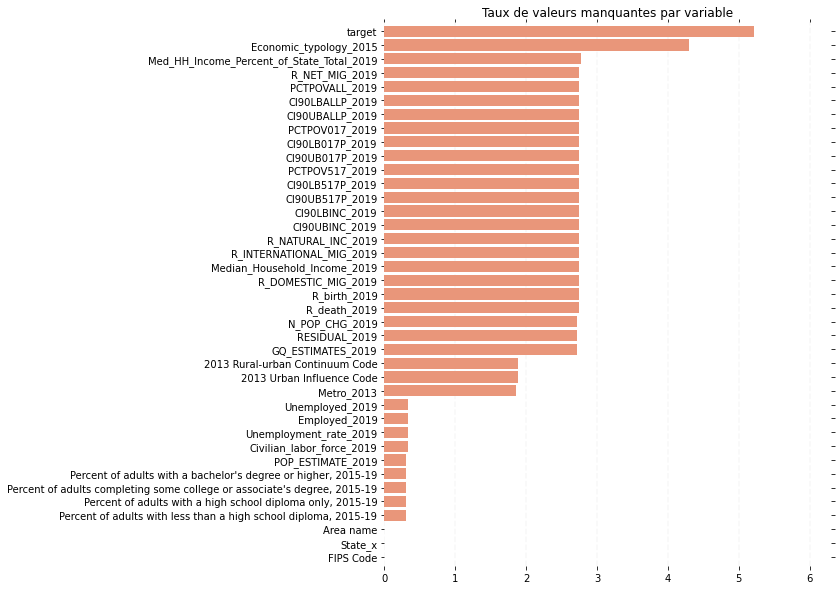

In [67]:
# Histogramme des taux de valeurs manquantes par variable

size = df_2019_pct.shape
nan_values = df_2019_pct.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/size[0]

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#E9967A',
                     zorder=2,
                     width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on",
               labelsize=10)
ax.set_title("Taux de valeurs manquantes par variable")
vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

<AxesSubplot:>

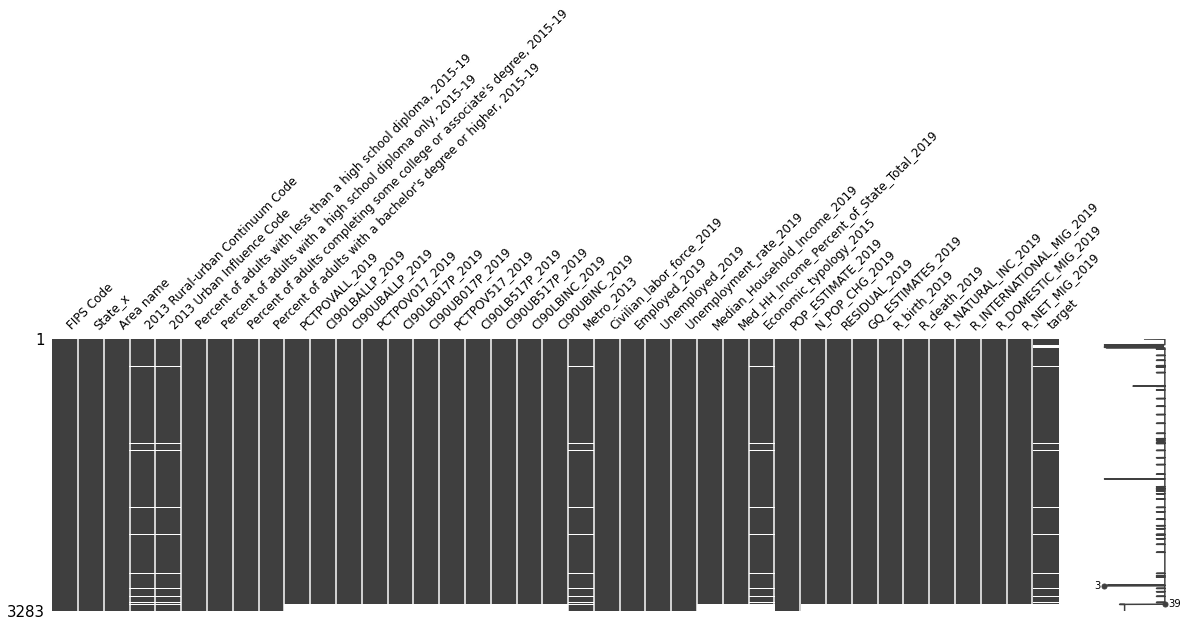

In [68]:
# Visualisation emplacements des valeurs manquantes
missingno.matrix(df_2019_pct, figsize = (20,5), fontsize=12)

In [69]:
df_2019_pct.tail()

FIPS Code State_x            Area name  2013 Rural-urban Continuum Code  \
3278      72145      PR  Vega Baja Municipio                              1.0   
3279      72147      PR    Vieques Municipio                              7.0   
3280      72149      PR   Villalba Municipio                              2.0   
3281      72151      PR    Yabucoa Municipio                              1.0   
3282      72153      PR      Yauco Municipio                              2.0   

      2013 Urban Influence Code  \
3278                        1.0   
3279                       12.0   
3280                        2.0   
3281                        1.0   
3282                        2.0   

      Percent of adults with less than a high school diploma, 2015-19  \
3278                                          28.428238                 
3279                                          28.773281                 
3280                                          21.993263                 
3281                                          29.048897                 
3282                                          26.556698                 

      Percent of adults with a high school diploma only, 2015-19  \
3278                                          26.225822            
3279                                          39.177906            
3280                                          38.366028            
3281                                          25.715004            
3282                                          33.272095            

      Percent of adults completing some college or associate's degree, 2015-19  \
3278                                          24.123638                          
3279                                          14.049454                          
3280                                          19.727892                          
3281                                          27.233078                          
3282                                          15.529844                          

      Percent of adults with a bachelor's degree or higher, 2015-19  \
3278                                          21.222300               
3279                                          17.999357               
3280                                          19.912819               
3281                                          18.003019               
3282                                          24.641363               

      PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
3278             NaN              NaN              NaN             NaN   
3279             NaN              NaN              NaN             NaN   
3280             NaN              NaN              NaN             NaN   
3281             NaN              NaN              NaN             NaN   
3282             NaN              NaN              NaN             NaN   

      CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
3278              NaN              NaN             NaN              NaN   
3279              NaN              NaN             NaN              NaN   
3280              NaN              NaN             NaN              NaN   
3281              NaN              NaN             NaN              NaN   
3282              NaN              NaN             NaN              NaN   

      CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
3278              NaN             NaN             NaN         1.0   
3279              NaN             NaN             NaN         0.0   
3280              NaN             NaN             NaN         1.0   
3281              NaN             NaN             NaN         1.0   
3282              NaN             NaN             NaN         1.0   

      Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
3278                    13037.0        11791.0           1246.0   
3279                     2585.0         2406.0            179.0   
3280                     740

In [70]:
df_2019_pct[df_2019_pct["State_x"]=='US'].head()

FIPS Code State_x      Area name  2013 Rural-urban Continuum Code  \
0          0      US  United States                              NaN   

   2013 Urban Influence Code  \
0                        NaN   

   Percent of adults with less than a high school diploma, 2015-19  \
0                                          11.998918                 

   Percent of adults with a high school diploma only, 2015-19  \
0                                          26.956844            

   Percent of adults completing some college or associate's degree, 2015-19  \
0                                          28.898697                          

   Percent of adults with a bachelor's degree or higher, 2015-19  \
0                                          32.145542               

   PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
0            12.3             12.2             12.4            16.8   

   CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
0             16.6             17.0            15.8             15.6   

   CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
0             16.0         65594.0         65830.0         NaN   

   Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
0                163100055.0    157115247.0        5984808.0   

   Unemployment_rate_2019  Median_Household_Income_2019  \
0                3.669409                       65712.0   

   Med_HH_Income_Percent_of_State_Total_2019  Economic_typology_2015  \
0                                        NaN                     NaN   

   POP_ESTIMATE_2019  N_POP_CHG_2019  RESIDUAL_2019  GQ_ESTIMATES_2019  \
0        328239523.0       1552022.0            0.0          8084362.0   

   R_birth_2019  R_death_2019  R_NATURAL_INC_2019  R_INTERNATIONAL_MIG_2019  \
0           NaN           NaN                 NaN                       NaN   

   R_DOMESTIC_MIG_2019  R_NET_MIG_2019  target  
0                  NaN             NaN     NaN

In [71]:
# Suppression des données de Porto Rico car énormément de variables non remplies. De plus ils n'ont actuellement pas le droit de vote à l'élection présidentielle américaine.
# Supression de la ligne globale US car des données manquantes et les votes se font par county

df_2019_final=df_2019_pct.drop(df_2019_pct[(df_2019_pct["State_x"]=='PR') | (df_2019_pct["State_x"]=='US')].index)
df_2019_final.tail()

FIPS Code State_x          Area name  2013 Rural-urban Continuum Code  \
3199      56037      WY  Sweetwater County                              5.0   
3200      56039      WY       Teton County                              7.0   
3201      56041      WY       Uinta County                              7.0   
3202      56043      WY    Washakie County                              7.0   
3203      56045      WY      Weston County                              7.0   

      2013 Urban Influence Code  \
3199                        8.0   
3200                        8.0   
3201                        8.0   
3202                       11.0   
3203                        9.0   

      Percent of adults with less than a high school diploma, 2015-19  \
3199                                           7.213361                 
3200                                           4.814409                 
3201                                           7.258562                 
3202                                          10.241615                 
3203                                           6.349518                 

      Percent of adults with a high school diploma only, 2015-19  \
3199                                          33.041271            
3200                                          14.876176            
3201                                          41.522678            
3202                                          29.751171            
3203                                          37.428741            

      Percent of adults completing some college or associate's degree, 2015-19  \
3199                                          37.246979                          
3200                                          23.304277                          
3201                                          35.189754                          
3202                                          36.620987                          
3203                                          36.249264                          

      Percent of adults with a bachelor's degree or higher, 2015-19  \
3199                                          22.498390               
3200                                          57.005138               
3201                                          16.029003               
3202                                          23.386225               
3203                                          19.972479               

      PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
3199             8.3              6.6             10.0            10.1   
3200             6.0              4.6              7.4             5.7   
3201             8.5              6.3             10.7             9.6   
3202            11.1              8.2             14.0            13.9   
3203            10.5              7.9             13.1            13.8   

      CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
3199              7.2             13.0             8.2              5.3   
3200              3.6              7.8             4.7              2.7   
3201              6.1             13.1             7.8              4.5   
3202              8.9             18.9            12.3              7.2   
3203              8.9             18.7            11.8              6.9   

      CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
3199             11.1         73437.0         87841.0         0.0   
3200              6.7         86531.0        111143.0         0.0   
3201             11.1         63191.0         78321.0         0.0   
3202             17.4         50050.0         60194.0         0.0   
3203             16.7         52275.0         66545.0         0.0   

      Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
3199                    21274.0        20446.0            828.0   
3200                    15575.0        15151.0            424.0   
3201                     9035.0         

<AxesSubplot:>

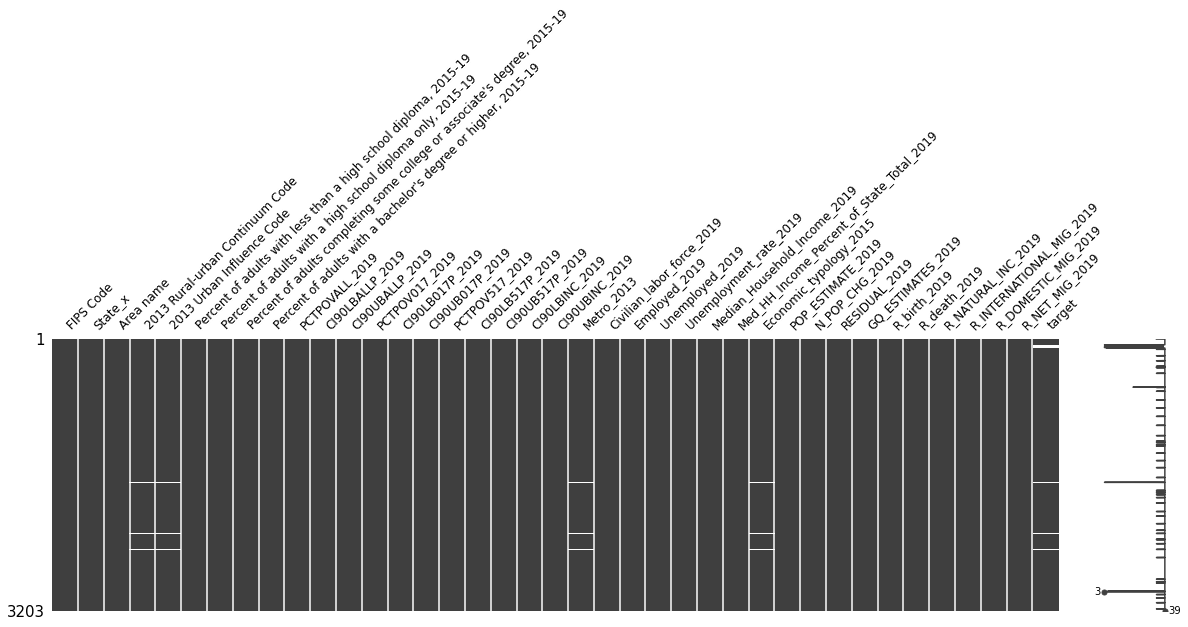

In [72]:
# Visualisation emplacements des valeurs manquantes
missingno.matrix(df_2019_final, figsize = (20,5), fontsize=12)

In [73]:
df_2019_final.isna().sum()

FIPS Code                                                                    0
State_x                                                                      0
Area name                                                                    0
2013 Rural-urban Continuum Code                                             60
2013 Urban Influence Code                                                   60
Percent of adults with less than a high school diploma, 2015-19             10
Percent of adults with a high school diploma only, 2015-19                  10
Percent of adults completing some college or associate's degree, 2015-19    10
Percent of adults with a bachelor's degree or higher, 2015-19               10
PCTPOVALL_2019                                                              11
CI90LBALLP_2019                                                             11
CI90UBALLP_2019                                                             11
PCTPOV017_2019                                      

In [142]:
# Counties non retrouvés dans le fichier des résultats élections 2020 (NAN dans variable 'target')
# --> Il s'agit des counties de l'Alaska et des lignes de regroupement à l'Etat 

df_2019_final[df_2019_final['target'].isna()].head(10)

FIPS Code State_x                   Area name  \
1        1000      AL                     Alabama   
69       2000      AK                      Alaska   
70       2010      AK            Aleutian Islands   
71       2013      AK      Aleutians East Borough   
72       2016      AK  Aleutians West Census Area   
73       2020      AK      Anchorage Municipality   
74       2050      AK          Bethel Census Area   
75       2060      AK         Bristol Bay Borough   
76       2068      AK              Denali Borough   
77       2070      AK      Dillingham Census Area   

    2013 Rural-urban Continuum Code  2013 Urban Influence Code  \
1                               NaN                        NaN   
69                              NaN                        NaN   
70                              NaN                        NaN   
71                              9.0                       12.0   
72                              9.0                       11.0   
73                              2.0                        2.0   
74                              7.0                       11.0   
75                              9.0                       12.0   
76                              8.0                        7.0   
77                              9.0                       12.0   

    Percent of adults with less than a high school diploma, 2015-19  \
1                                           13.819302                 
69                                           7.152934                 
70                                                NaN                 
71                                          14.525994                 
72                                          10.540344                 
73                                           6.098400                 
74                                          19.089890                 
75                                           5.984252                 
76                                           1.536570                 
77                                          13.678757                 

    Percent of adults with a high school diploma only, 2015-19  \
1                                           30.800268            
69                                          28.003729            
70                                                NaN            
71                                          43.463303            
72                                          39.035618            
73                                          23.420025            
74                                          46.423836            
75                                          37.007874            
76                                          25.998772            
77                                          37.236614            

    Percent of adults completing some college or associate's degree, 2015-19  \
1                                           29.912098                          
69                                          35.292122                          
70                                                NaN                          
71                                          30.504587                          
72                                          33.389870                          
73                                          34.372753                          
74                                          22.609938                          
75                                          34.488190                          
76                                          31.407499                          
77                                          27.012091                          

    Percent of adults with a bachelor's degree or higher, 2015-19  \
1                                           25.468332               
69                                          29.551214               
70                                                NaN               
71                         

In [145]:
# Exemple des lignes regroupement de counties au niveau de l'Etat, non retrouvés dans le fichier des résultats élections 2020 (NAN dans variable 'target')
df_2019_final[(df_2019_final['target'].isna()) & (df_2019_final['State_x'] != "AK")].head()

FIPS Code State_x   Area name  2013 Rural-urban Continuum Code  \
1         1000      AL     Alabama                              NaN   
106       4000      AZ     Arizona                              NaN   
122       5000      AR    Arkansas                              NaN   
198       6000      CA  California                              NaN   
257       8000      CO    Colorado                              NaN   

     2013 Urban Influence Code  \
1                          NaN   
106                        NaN   
122                        NaN   
198                        NaN   
257                        NaN   

     Percent of adults with less than a high school diploma, 2015-19  \
1                                            13.819302                 
106                                          12.860705                 
122                                          13.430243                 
198                                          16.692171                 
257                                           8.253678                 

     Percent of adults with a high school diploma only, 2015-19  \
1                                            30.800268            
106                                          23.858877            
122                                          34.034885            
198                                          20.487896            
257                                          21.368059            

     Percent of adults completing some college or associate's degree, 2015-19  \
1                                            29.912098                          
106                                          33.813610                          
122                                          29.507084                          
198                                          28.893970                          
257                                          29.465919                          

     Percent of adults with a bachelor's degree or higher, 2015-19  \
1                                            25.468332               
106                                          29.466806               
122                                          23.027790               
198                                          33.925964               
257                                          40.912342               

     PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
1              15.6             15.2             16.0            21.9   
106            13.5             13.2             13.8            19.2   
122            16.0             15.6             16.4            21.7   
198            11.8             11.7             11.9            15.6   
257             9.4              9.1              9.7            11.2   

     CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
1               21.1             22.7            20.7             19.8   
106             18.4             20.0            18.1             17.2   
122             20.8             22.6            19.9             18.9   
198             15.3             15.9            15.2             14.8   
257             10.5             11.9            10.7              9.9   

     CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
1               21.6         51179.0         52363.0         NaN   
106             19.0         61584.0         62470.0         NaN   
122             20.9         48177.0         49863.0         NaN   
198             15.6         80110.0         80736.0         NaN   
257             11.5         76329.0         77879.0         NaN   

     Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
1                    2241747.0      2174483.0          67264.0   
106                  3551260.0      3384504.0         166756.0   
122                  1362642.0      1314290.0          48352.0   
198                 19411572.0     18627378.0         784194.0   
257   

In [141]:
# visualisation des counties d'Alaska dans le fichier des résultats d'élections 2020 --> les county_fips et county_name ne correspondent pas du tout à ceux des fichiers de données démographiques
df_2020results[df_2020results['state_name']== 'Alaska'].head()

state_name  county_fips county_name  votes_gop  votes_dem  total_votes  \
67     Alaska         2901  District 1       3511       3477         7360   
68     Alaska         2902  District 2       3674       2104         6161   
69     Alaska         2903  District 3       6076       1903         8385   
70     Alaska         2904  District 4       4690       5345        10587   
71     Alaska         2905  District 5       4077       4204         8706   

    diff   per_gop   per_dem  per_point_diff winner2020  target  
67    34  0.477038  0.472418        0.004620        gop       1  
68  1570  0.596332  0.341503        0.254829        gop       1  
69  4173  0.724627  0.226953        0.497674        gop       1  
70  -655  0.442996  0.504864       -0.061868        dem       0  
71  -127  0.468298  0.482885       -0.014588        dem       0

In [76]:
# Suppression de toutes les lignes target = NAN (counties d'Alaska et lignes de regroupement niveau Etat
df_target_clean = df_2019_final.drop(df_2019_final[(df_2019_final["target"].isna())].index)

In [77]:
df_target_clean.reset_index(drop=True, inplace=True)

In [78]:
df_target_clean.shape

(3112, 39)

In [79]:
df_target_clean.head()

FIPS Code State_x       Area name  2013 Rural-urban Continuum Code  \
0       1001      AL  Autauga County                              2.0   
1       1003      AL  Baldwin County                              3.0   
2       1005      AL  Barbour County                              6.0   
3       1007      AL     Bibb County                              1.0   
4       1009      AL   Blount County                              1.0   

   2013 Urban Influence Code  \
0                        2.0   
1                        2.0   
2                        6.0   
3                        1.0   
4                        1.0   

   Percent of adults with less than a high school diploma, 2015-19  \
0                                          11.483395                 
1                                           9.193843                 
2                                          26.786907                 
3                                          20.942602                 
4                                          19.509438                 

   Percent of adults with a high school diploma only, 2015-19  \
0                                          33.588459            
1                                          27.659616            
2                                          35.604542            
3                                          44.878773            
4                                          33.422131            

   Percent of adults completing some college or associate's degree, 2015-19  \
0                                          28.356571                          
1                                          31.284081                          
2                                          26.029837                          
3                                          23.800098                          
4                                          33.975021                          

   Percent of adults with a bachelor's degree or higher, 2015-19  \
0                                          26.571573               
1                                          31.862459               
2                                          11.578713               
3                                          10.378526               
4                                          13.093413               

   PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
0            12.1              9.9             14.3            15.9   
1            10.1              8.4             11.8            13.5   
2            27.1             22.0             32.2            41.0   
3            20.3             16.0             24.6            25.9   
4            16.3             14.1             18.5            21.0   

   CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
0             11.5             20.3            14.4              9.4   
1              9.6             17.4            13.3              9.4   
2             31.2             50.8            39.5             30.0   
3             18.7             33.1            25.2             17.7   
4             16.7             25.3            21.4             17.0   

   CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
0             19.4         52517.0         63949.0         1.0   
1             17.2         54593.0         65149.0         1.0   
2             49.0         31822.0         40122.0         0.0   
3             32.7         42291.0         53545.0         1.0   
4             25.8         46777.0         59027.0         1.0   

   Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
0                    26172.0        25458.0            714.0   
1                    97328.0        94675.0           2653.0   
2                     8537.0         8213.0            324.0   
3                     8685.0         8419.0            266.0   
4                    25331.0        24655.0            676.0   

   Unemployment_rate_2019  Median

<AxesSubplot:>

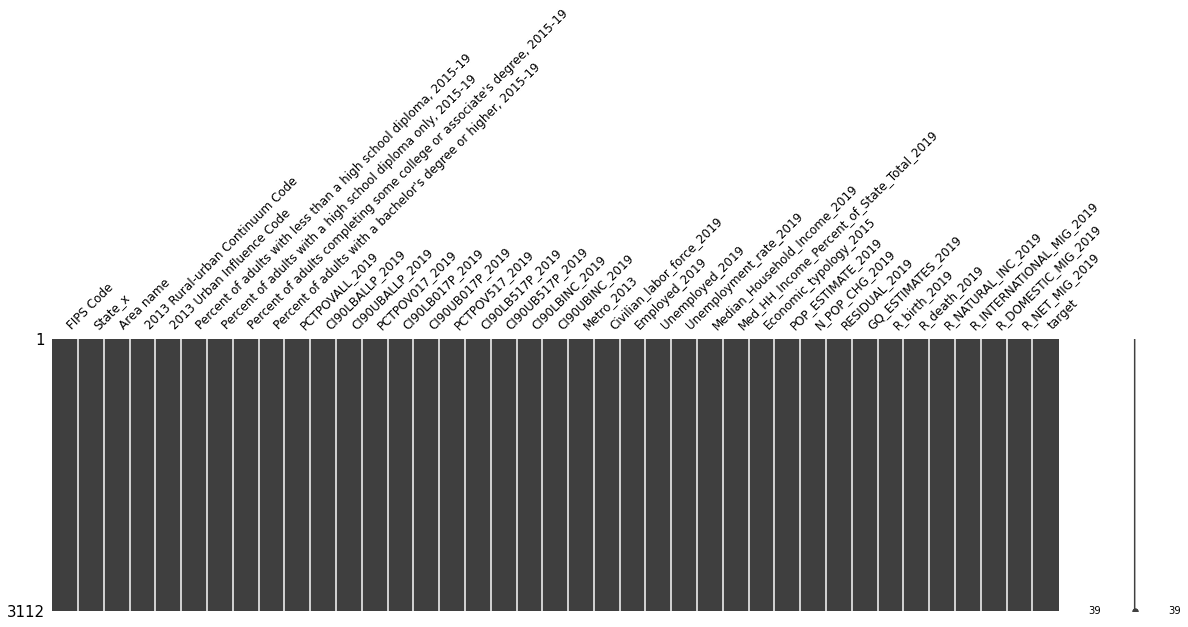

In [80]:
# Visualisation emplacements des valeurs manquantes
missingno.matrix(df_target_clean, figsize = (20,5), fontsize=12)

In [81]:
df_target_clean.isna().sum()

FIPS Code                                                                   0
State_x                                                                     0
Area name                                                                   0
2013 Rural-urban Continuum Code                                             0
2013 Urban Influence Code                                                   0
Percent of adults with less than a high school diploma, 2015-19             0
Percent of adults with a high school diploma only, 2015-19                  0
Percent of adults completing some college or associate's degree, 2015-19    0
Percent of adults with a bachelor's degree or higher, 2015-19               0
PCTPOVALL_2019                                                              0
CI90LBALLP_2019                                                             0
CI90UBALLP_2019                                                             0
PCTPOV017_2019                                                  

#### <span style="color:#191970">Export CSV df_target_clean</span>

In [ ]:
df_target_clean.to_csv('./df_target_clean.csv', index=False)

#### <span style="color:#191970">Recherche de valeurs aberrantes</span>

Text(0, 0.5, '')

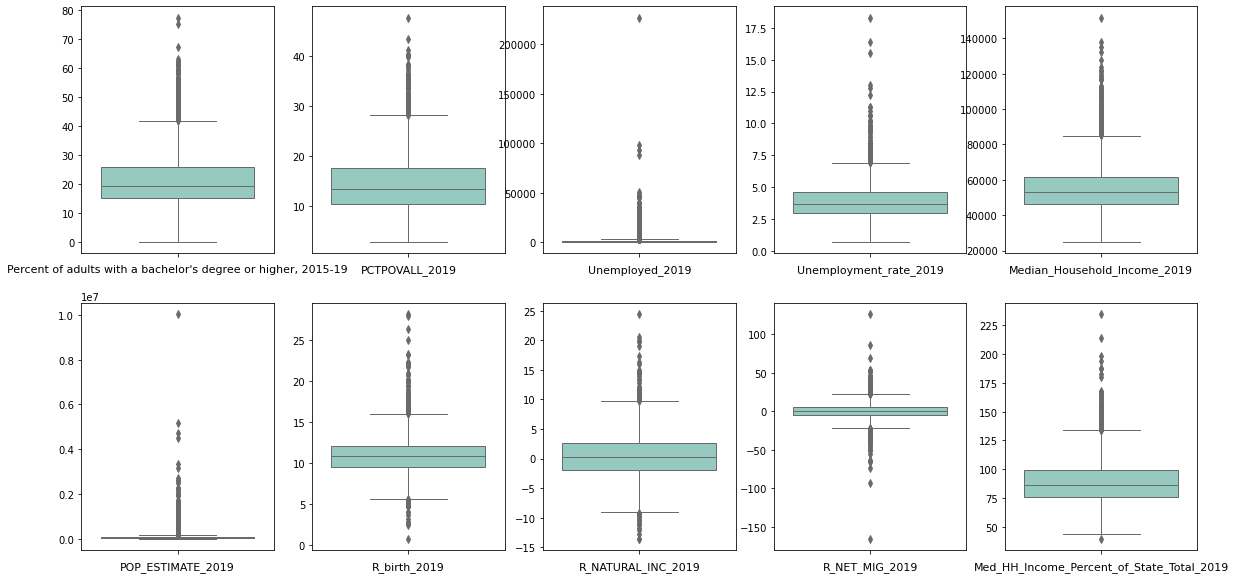

In [85]:
#Boxplots 

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

ax1=sns.boxplot(data = df_target_clean, y = "Percent of adults with a bachelor's degree or higher, 2015-19", linewidth = 1 , palette = 'Set3', ax=axes[0,0])
ax1.set_xlabel("Percent of adults with a bachelor's degree or higher, 2015-19", fontsize=11)
ax1.set_ylabel('')

ax2=sns.boxplot(data = df_target_clean, y = "PCTPOVALL_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,1])
ax2.set_xlabel('PCTPOVALL_2019', fontsize=11)
ax2.set_ylabel('')

ax10=sns.boxplot(data = df_target_clean, y = "Unemployed_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,2])
ax10.set_xlabel('Unemployed_2019', fontsize=11)
ax10.set_ylabel('')

ax3=sns.boxplot(data = df_target_clean, y = "Unemployment_rate_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,3])
ax3.set_xlabel('Unemployment_rate_2019', fontsize=11)
ax3.set_ylabel('')

ax4=sns.boxplot(data = df_target_clean, y = "Median_Household_Income_2019", linewidth = 1 , palette = 'Set3', ax=axes[0,4])
ax4.set_xlabel('Median_Household_Income_2019', fontsize=11)
ax4.set_ylabel('')

ax5=sns.boxplot(data = df_target_clean, y = "POP_ESTIMATE_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,0])
ax5.set_xlabel('POP_ESTIMATE_2019', fontsize=11)
ax5.set_ylabel('')

ax6=sns.boxplot(data = df_target_clean, y = "R_birth_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,1])
ax6.set_xlabel('R_birth_2019', fontsize=11)
ax6.set_ylabel('')

ax7=sns.boxplot(data = df_target_clean, y = "R_NATURAL_INC_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,2])
ax7.set_xlabel('R_NATURAL_INC_2019', fontsize=11)
ax7.set_ylabel('')

ax8=sns.boxplot(data = df_target_clean, y = "R_NET_MIG_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,3])
ax8.set_xlabel('R_NET_MIG_2019', fontsize=11)
ax8.set_ylabel('')

ax10=sns.boxplot(data = df_target_clean, y = "Med_HH_Income_Percent_of_State_Total_2019", linewidth = 1 , palette = 'Set3', ax=axes[1,4])
ax10.set_xlabel('Med_HH_Income_Percent_of_State_Total_2019', fontsize=11)
ax10.set_ylabel('')

In [50]:
df_target_clean[df_target_clean["Unemployed_2019"]>150000].head()

FIPS Code State_x           Area name  2013 Rural-urban Continuum Code  \
175       6037      CA  Los Angeles County                              1.0   

     2013 Urban Influence Code  \
175                        1.0   

     Percent of adults with less than a high school diploma, 2015-19  \
175                                          20.866573                 

     Percent of adults with a high school diploma only, 2015-19  \
175                                           20.61087            

     Percent of adults completing some college or associate's degree, 2015-19  \
175                                          25.981346                          

     Percent of adults with a bachelor's degree or higher, 2015-19  \
175                                           32.54121               

     PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
175            13.4             13.0             13.8            18.3   

     CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
175             17.4             19.2            18.1             17.2   

     CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
175             19.0         72077.0         73365.0         1.0   

     Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
175                  5121584.0      4894296.0         227288.0   

     Unemployment_rate_2019  Median_Household_Income_2019  \
175                     4.4                       72721.0   

     Med_HH_Income_Percent_of_State_Total_2019  Economic_typology_2015  \
175                                  90.423134                     0.0   

     POP_ESTIMATE_2019  N_POP_CHG_2019  Births_2019  Deaths_2019  \
175         10039107.0        -34799.0     112963.0      68164.0   

     NATURAL_INC_2019  INTERNATIONAL_MIG_2019  DOMESTIC_MIG_2019  \
175           44799.0                 21050.0          -100808.0   

     NET_MIG_2019  RESIDUAL_2019  GQ_ESTIMATES_2019  R_birth_2019  \
175      -79758.0          160.0           179406.0     11.232827   

     R_death_2019  R_NATURAL_INC_2019  R_INTERNATIONAL_MIG_2019  \
175      6.778099            4.454728                  2.093172   

     R_DOMESTIC_MIG_2019  R_NET_MIG_2019  target  
175           -10.024157       -7.930985     0.0

In [86]:
df_target_clean[df_target_clean["POP_ESTIMATE_2019"]>10000000].head()

FIPS Code State_x           Area name  2013 Rural-urban Continuum Code  \
175       6037      CA  Los Angeles County                              1.0   

     2013 Urban Influence Code  \
175                        1.0   

     Percent of adults with less than a high school diploma, 2015-19  \
175                                          20.866573                 

     Percent of adults with a high school diploma only, 2015-19  \
175                                           20.61087            

     Percent of adults completing some college or associate's degree, 2015-19  \
175                                          25.981346                          

     Percent of adults with a bachelor's degree or higher, 2015-19  \
175                                           32.54121               

     PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
175            13.4             13.0             13.8            18.3   

     CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
175             17.4             19.2            18.1             17.2   

     CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
175             19.0         72077.0         73365.0         1.0   

     Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
175                  5121584.0      4894296.0         227288.0   

     Unemployment_rate_2019  Median_Household_Income_2019  \
175                     4.4                       72721.0   

     Med_HH_Income_Percent_of_State_Total_2019  Economic_typology_2015  \
175                                  90.423134                     0.0   

     POP_ESTIMATE_2019  N_POP_CHG_2019  RESIDUAL_2019  GQ_ESTIMATES_2019  \
175         10039107.0        -34799.0          160.0           179406.0   

     R_birth_2019  R_death_2019  R_NATURAL_INC_2019  R_INTERNATIONAL_MIG_2019  \
175     11.232827      6.778099            4.454728                  2.093172   

     R_DOMESTIC_MIG_2019  R_NET_MIG_2019  target  
175           -10.024157       -7.930985     0.0

In [149]:
df_target_clean[df_target_clean["Unemployment_rate_2019"]>15.0].head()

FIPS Code State_x         Area name  2013 Rural-urban Continuum Code  \
81         4027      AZ       Yuma County                              3.0   
169        6025      CA   Imperial County                              3.0   
1402      28063      MS  Jefferson County                              8.0   

      2013 Urban Influence Code  \
81                          2.0   
169                         2.0   
1402                        7.0   

      Percent of adults with less than a high school diploma, 2015-19  \
81                                            26.746960                 
169                                           30.271055                 
1402                                          22.037037                 

      Percent of adults with a high school diploma only, 2015-19  \
81                                            25.707840            
169                                           24.319637            
1402                                          37.880657            

      Percent of adults completing some college or associate's degree, 2015-19  \
81                                            32.519093                          
169                                           30.190239                          
1402                                          24.176954                          

      Percent of adults with a bachelor's degree or higher, 2015-19  \
81                                            15.026110               
169                                           15.219069               
1402                                          15.905350               

      PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
81              20.4             17.9             22.9            29.7   
169             22.0             19.0             25.0            30.7   
1402            28.9             21.2             36.6            43.2   

      CI90LB017P_2019  CI90UB017P_2019  PCTPOV517_2019  CI90LB517P_2019  \
81               24.8             34.6            28.6             23.4   
169              25.7             35.7            28.5             23.1   
1402             29.5             56.9            41.9             27.2   

      CI90UB517P_2019  CI90LBINC_2019  CI90UBINC_2019  Metro_2013  \
81               33.8         43733.0         50315.0         1.0   
169              33.9         45177.0         51027.0         1.0   
1402             56.6         27121.0         34621.0         0.0   

      Civilian_labor_force_2019  Employed_2019  Unemployed_2019  \
81                      99824.0        83437.0          16387.0   
169                     71411.0        58331.0          13080.0   
1402                     2028.0         1714.0            314.0   

      Unemployment_rate_2019  Median_Household_Income_2019  \
81                      16.4                       47024.0   
169                     18.3                       48102.0   
1402                    15.5                       30871.0   

      Med_HH_Income_Percent_of_State_Total_2019  Economic_typology_2015  \
81                                    75.812149                     5.0   
169                                   59.811249                     4.0   
1402                                  67.216080                     0.0   

      POP_ESTIMATE_2019  N_POP_CHG_2019  RESIDUAL_2019  GQ_ESTIMATES_2019  \
81             213787.0          2175.0           -6.0             9459.0   
169            181215.0          -308.0           10.0             8745.0   
1402             6990.0          -103.0            0.0              357.0   

      R_birth_2019  R_death_2019  R_NATURAL_INC_2019  \
81       14.062092      8.053616            6.008477   
169      15.041159      5.949197            9.091962   
1402     11.503231     11.361216            0.142015   

      R_INTERNATIONAL_MIG_2019  R_DOMESTIC_MIG_2019  R_NET_MIG_2019  target  
81                    2.567002             1.678424        4.24542

Quelques valeurs qui se détachent des autres mais ceci est lié aux disparités typiques du territoire américain, tant en terme d'étendue géographique, qu'en terme de répartition de la population ou de richesses. 

### <span style="color:#191970">2.2. Statistiques</span>

#### <span style="color:#191970">Statistiques générales</span>

In [150]:
df_target_clean.describe(include=[np.number])

FIPS Code  2013 Rural-urban Continuum Code  \
count   3112.000000                      3112.000000   
mean   30651.696979                         4.985219   
std    14984.651238                         2.702269   
min     1001.000000                         1.000000   
25%    19038.500000                         2.000000   
50%    29208.000000                         6.000000   
75%    46005.500000                         7.000000   
max    56045.000000                         9.000000   

       2013 Urban Influence Code  \
count                3112.000000   
mean                    5.224293   
std                     3.472972   
min                     1.000000   
25%                     2.000000   
50%                     5.000000   
75%                     8.000000   
max                    12.000000   

       Percent of adults with less than a high school diploma, 2015-19  \
count                                        3112.000000                 
mean                                           13.085088                 
std                                             6.265950                 
min                                             1.116910                 
25%                                             8.479882                 
50%                                            11.739182                 
75%                                            16.708521                 
max                                            73.560211                 

       Percent of adults with a high school diploma only, 2015-19  \
count                                        3112.000000            
mean                                           34.147758            
std                                             7.226061            
min                                             7.265136            
25%                                            29.689806            
50%                                            34.538523            
75%                                            39.099957            
max                                            57.433674            

       Percent of adults completing some college or associate's degree, 2015-19  \
count                                        3112.000000                          
mean                                           30.802965                          
std                                             5.211923                          
min                                             5.235602                          
25%                                            27.290243                          
50%                                            30.785382                          
75%                                            34.214836                          
max                                            60.563381                          

       Percent of adults with a bachelor's degree or higher, 2015-19  \
count                                        3112.000000               
mean                                           21.964189               
std                                             9.582236               
min                                             0.000000               
25%                                            15.325250               
50%                                            19.557242               
75%                                            25.989834               
max                                            77.557411               

       PCTPOVALL_2019  CI90LBALLP_2019  CI90UBALLP_2019  PCTPOV017_2019  \
count     3112.000000      3112.000000      3112.000000     3112.000000   
mean        14.470662        11.547558        17.393766       19.998008   
std          5.793896         4.687841         6.993406        8.493742   
min          2.700000         2.200000         3.200000        2.400000   
25%         10.400000         8.200000        12.500000       13.700000   
50%         13.400000        10.700000      

#### <span style="color:#191970">Répartition des résultats d'élections</span>

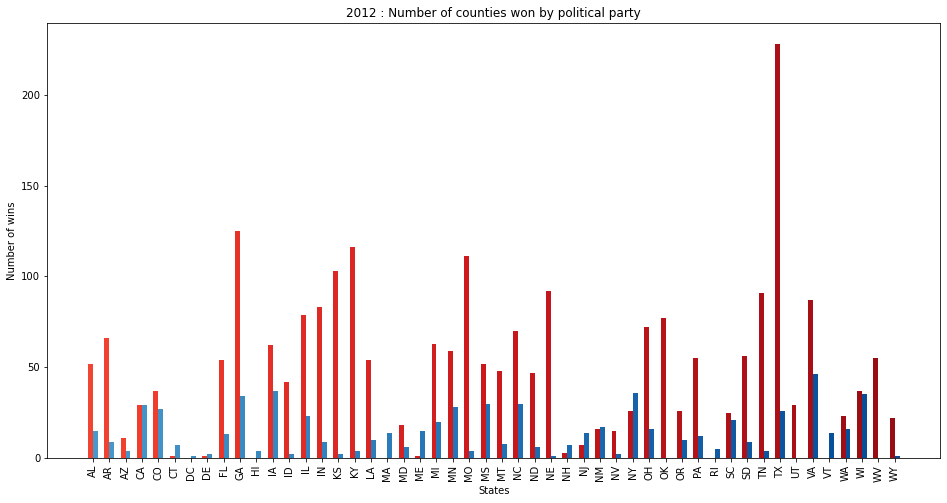

In [213]:
# Nombre de victoires par parti (Rep/GOP), par Etat en 2012

color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

# Rep:target=1 (donc sum de target = nb de victoires des Rep)
# GOP:target=0. 'FIPS Code'= donne le nombre total de county par Etat (donc total - victoires Rep = victoire des GOP)
states2012 = df_2008_2016results.groupby('State_x').agg({'fips_code':'count','target2012':'sum'}).sort_values(by='State_x',ascending=True)
states2012['GOP wins 2012'] = states2012['fips_code'] - states2012['target2012']

data1_2012 = states2012['target2012']
data2_2012 = states2012['GOP wins 2012']

plt.figure(figsize=(16,8))
x = np.arange(50)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('2012 : Number of counties won by political party')
plt.xticks(x + w /2, data1_2012.index, rotation=90)
ax1.set_xlabel('States')
ax1.set_ylabel('Number of wins')
ax1.bar(x,data1_2012.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2_2012, color=color_2,width=w,align='center')

plt.show()

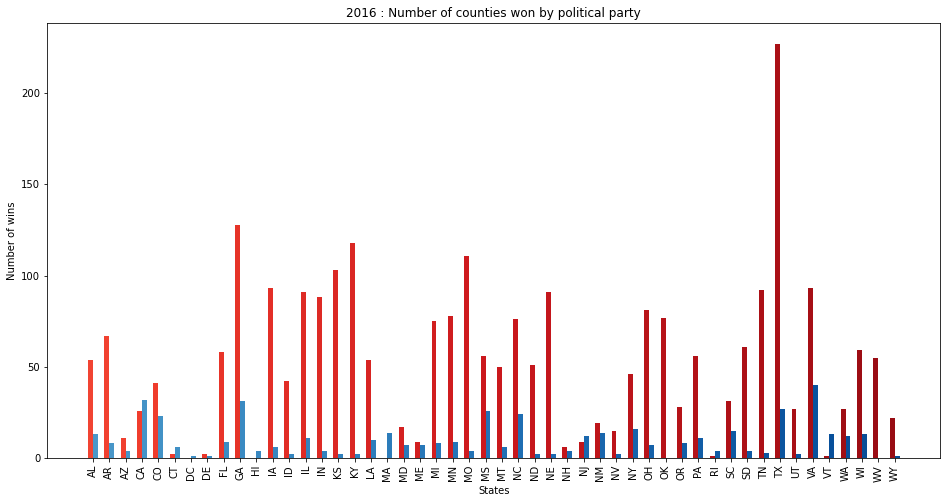

In [214]:
# Nombre de victoires par parti (Rep/GOP), par Etat en 2016

color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

# Rep:target=1 (donc sum de target = nb de victoires des Rep)
# GOP:target=0. 'FIPS Code'= donne le nombre total de county par Etat (donc total - victoires Rep = victoire des GOP)
states2016 = df_2008_2016results.groupby('State_x').agg({'fips_code':'count','target2016':'sum'}).sort_values(by='State_x',ascending=True)
states2016['GOP wins 2016'] = states2016['fips_code'] - states2016['target2016']

data1_2016 = states2016['target2016']
data2_2016 = states2016['GOP wins 2016']

plt.figure(figsize=(16,8))
x = np.arange(50)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('2016 : Number of counties won by political party')
plt.xticks(x + w /2, data1_2016.index, rotation=90)
ax1.set_xlabel('States')
ax1.set_ylabel('Number of wins')
ax1.bar(x,data1_2016.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2_2016, color=color_2,width=w,align='center')

plt.show()

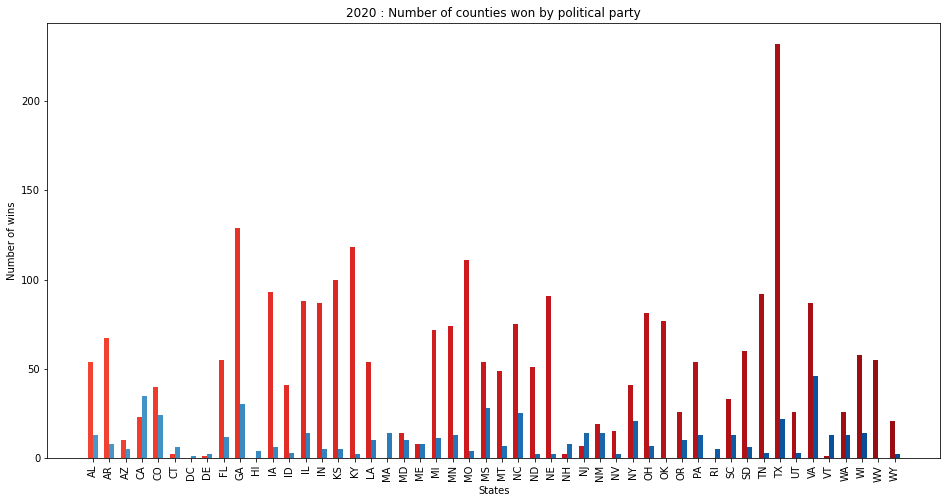

In [151]:
# Nombre de victoires par parti (Rep/GOP), par Etat en 2020

color_1 = plt.cm.Reds(np.linspace(0.6, 1, 66))
color_2 = plt.cm.Blues(np.linspace(0.6, 1, 66))

target_na = df_2019_final.groupby("State_x")["target"].count()

# Rep:target=1 (donc sum de target = nb de victoires des Rep)
# GOP:target=0. 'FIPS Code'= donne le nombre total de county par Etat (donc total - victoires Rep = victoire des GOP)
states = df_target_clean.groupby('State_x').agg({'FIPS Code':'count','target':'sum'}).sort_values(by='State_x',ascending=True)
states['GOP wins'] = states['FIPS Code'] - states['target']

data1 = states['target']
data2 = states['GOP wins']

plt.figure(figsize=(16,8))
x = np.arange(50)
ax1 = plt.subplot(1,1,1)
w = 0.3

color = color_1
plt.title('2020 : Number of counties won by political party')
plt.xticks(x + w /2, data1.index, rotation=90)
ax1.set_xlabel('States')
ax1.set_ylabel('Number of wins')
ax1.bar(x,data1.values,color=color_1,width=w,align='center')

color = color_2
ax2 = ax1
ax2.bar(x + w,data2, color=color_2,width=w,align='center')

plt.show()

#### <span style="color:#191970">Analyse des corrélations</span>

##### <span style="color:#191970">Données Education</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson : Education_histo')

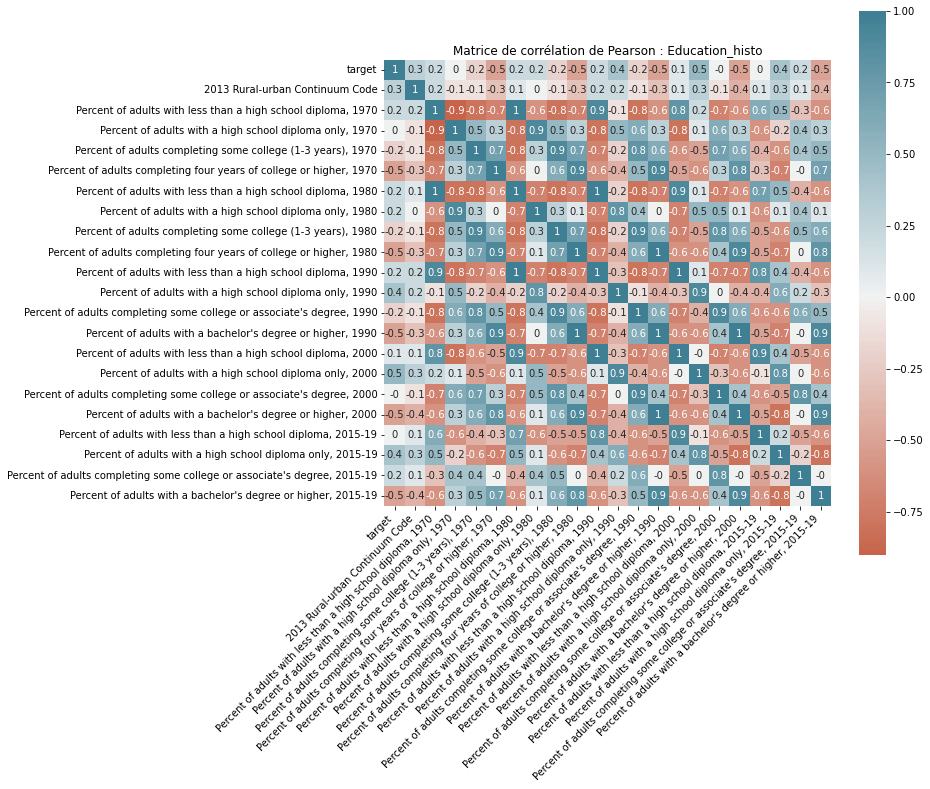

In [168]:
# Matrice de corrélation de Pearson : fichier education avec tout l'historique

matrice_corr = df[["target","2013 Rural-urban Continuum Code","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"]].corr().round(1)
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson : Education_histo")

##### <span style="color:#191970">Données PovertyEstimate</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - PovertyEstimate_2019')

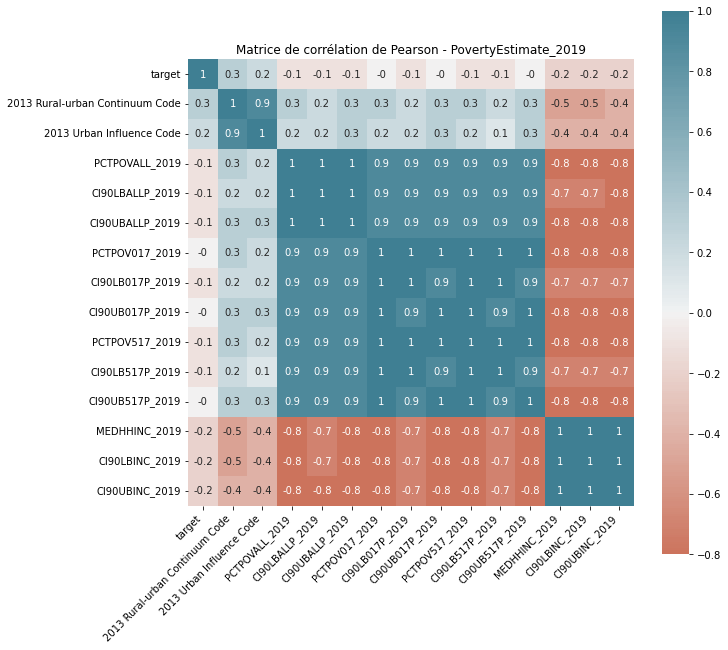

In [169]:
# Matrice de corrélation de Pearson : fichier PovertyEstimate - 2019

matrice_corr = df[['target',"2013 Rural-urban Continuum Code", "2013 Urban Influence Code", 'PCTPOVALL_2019','CI90LBALLP_2019','CI90UBALLP_2019','PCTPOV017_2019','CI90LB017P_2019','CI90UB017P_2019','PCTPOV517_2019','CI90LB517P_2019','CI90UB517P_2019', "MEDHHINC_2019", 'CI90LBINC_2019','CI90UBINC_2019']].corr().round(1)
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - PovertyEstimate_2019")

Les variables "Rural-urban_Continuum_Code_2013" et "2013 Urban Influence Code" sont très corrélées. Nous conserverons la première car un peu plus corrélée avec la target.<br>
Toutes les données de pauvreté sont très corrélées entre elles. Nous n'allons conserver que la variable PCTPOVALL_2019 qui est la variable regroupant toutes les tranches d'âge ("Estimated percent of people of all ages in poverty 2019"). <br> 
Les variables MEDHHINC_2019, CI90LBINC_2019 et CI90UBINC_2019 sont des variables de revenus médian, qui apparaissent également dans le fichier Unemployement (celles que nous conserverons).

##### <span style="color:#191970">Données Unemployment</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Unemployment_2019')

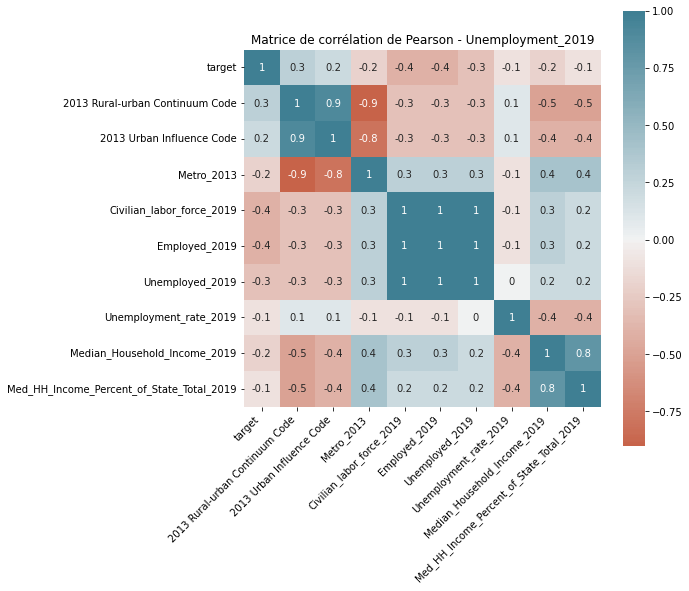

In [165]:
# Matrice de corrélation de Pearson : fichier Unemployment - données 2019

matrice_corr = df_target_clean[['target','2013 Rural-urban Continuum Code',"2013 Urban Influence Code", 'Metro_2013', 'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019', 'Unemployment_rate_2019', 'Median_Household_Income_2019', 'Med_HH_Income_Percent_of_State_Total_2019']].corr().round(1)
plt.figure(figsize=(8,8))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Unemployment_2019")

Les variables "Rural-urban_Continuum_Code_2013", "2013 Urban Influence Code" et "Metro_2013" sont très corrélées. Nous conserverons la première car un peu plus corrélée avec la target.<br>
Les variables "Civilian_labor_force_2019", "Employed_2019" et "Unemployed_2019" sont complètement corrélées. En effet, "Civilian_labor_force_2019" = "Employed_2019" + "Unemployed_2019". <br>
Nous conserverons la variable "Unemployed_2019" pour avoir le nombre de personne sans emploi. <br>
Les deux variables de revenus médian sont corrélées à 0.8, nous garderons celui en %.

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Unemployment_histo')

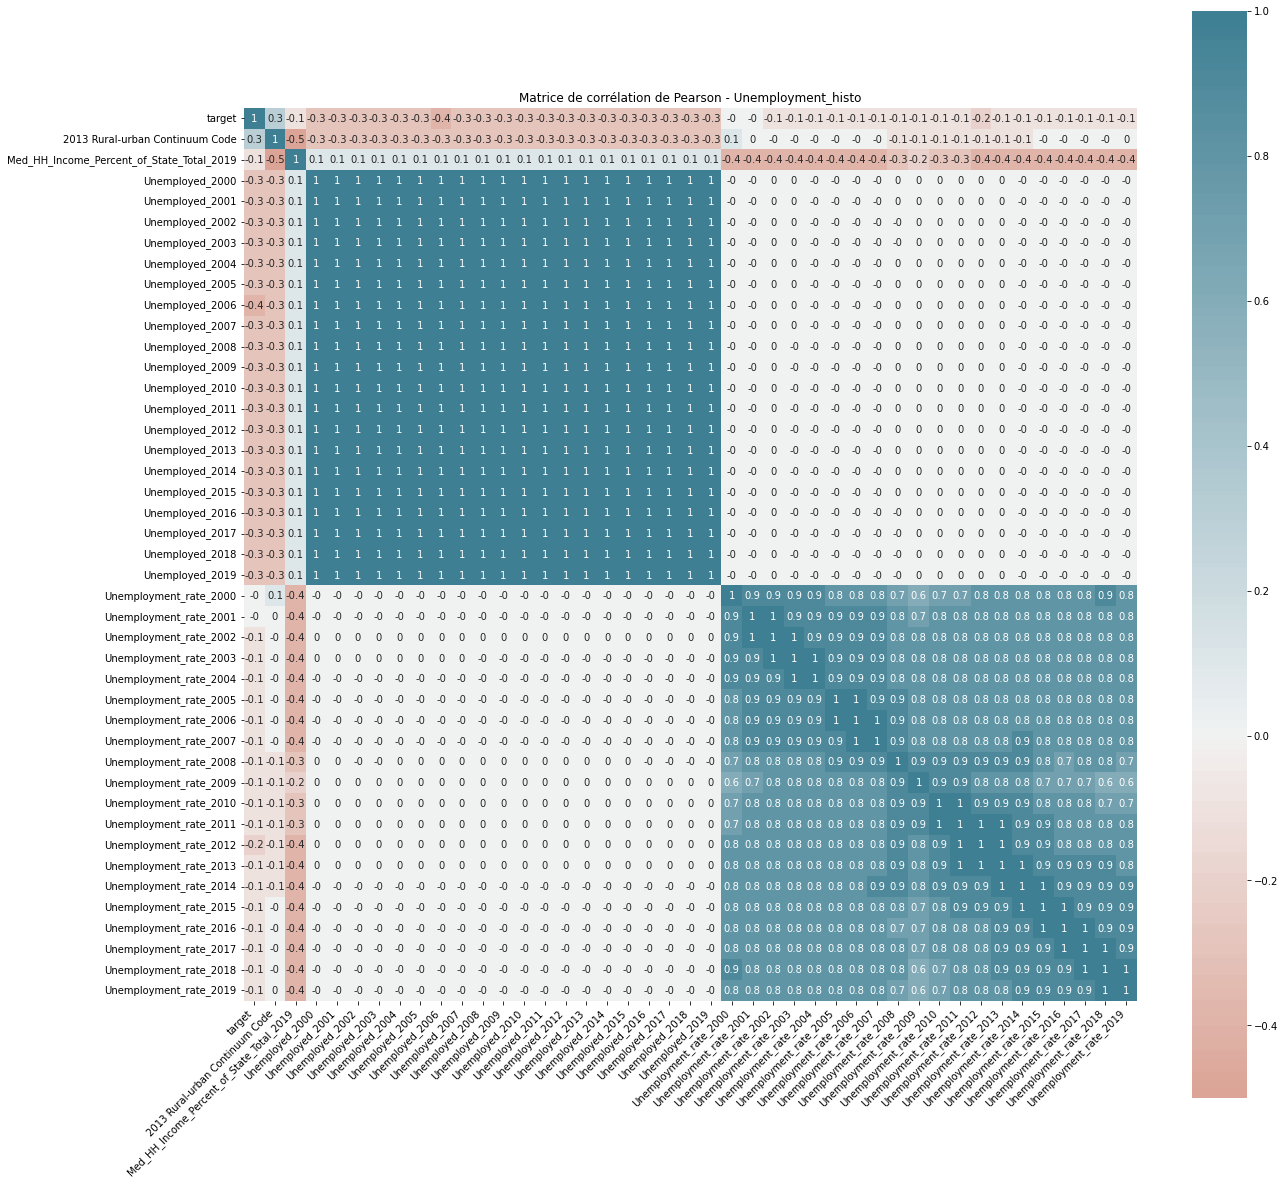

In [170]:
# Matrice de corrélation de Pearson : fichier unemployment - données historique 2000 à 2019

matrice_corr = df[["target","2013 Rural-urban Continuum Code","Med_HH_Income_Percent_of_State_Total_2019","Unemployed_2000","Unemployed_2001","Unemployed_2002","Unemployed_2003","Unemployed_2004","Unemployed_2005","Unemployed_2006","Unemployed_2007","Unemployed_2008","Unemployed_2009","Unemployed_2010","Unemployed_2011","Unemployed_2012","Unemployed_2013","Unemployed_2014","Unemployed_2015","Unemployed_2016","Unemployed_2017","Unemployed_2018","Unemployed_2019","Unemployment_rate_2000","Unemployment_rate_2001","Unemployment_rate_2002","Unemployment_rate_2003","Unemployment_rate_2004","Unemployment_rate_2005","Unemployment_rate_2006","Unemployment_rate_2007","Unemployment_rate_2008","Unemployment_rate_2009","Unemployment_rate_2010","Unemployment_rate_2011","Unemployment_rate_2012","Unemployment_rate_2013","Unemployment_rate_2014","Unemployment_rate_2015","Unemployment_rate_2016","Unemployment_rate_2017","Unemployment_rate_2018","Unemployment_rate_2019"]].corr().round(1)
plt.figure(figsize=(20,20))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Unemployment_histo")

Les données historiques pour la variable "Unemployed" sont totalement corrélées. De même, les données d'historique pour "Unemployment_rate" sont très corrélées entre elles.<br>
Nous conservervons les valeurs les plus récentes pour modéliser (2019).

##### <span style="color:#191970">Données Population</span>

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Population_2019')

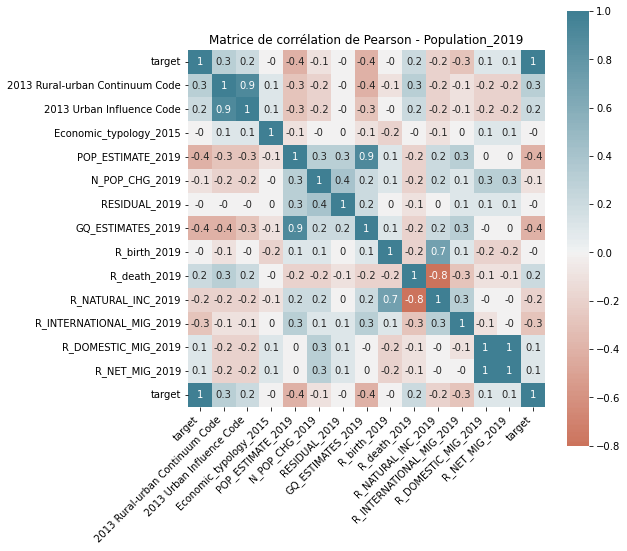

In [166]:
# Matrice de corrélation de Pearson : fichier Population - données 2019

matrice_corr = df_target_clean[['target', '2013 Rural-urban Continuum Code',"2013 Urban Influence Code",'Economic_typology_2015','POP_ESTIMATE_2019','N_POP_CHG_2019', 'RESIDUAL_2019', 'GQ_ESTIMATES_2019', 'R_birth_2019', 'R_death_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2019', 'target']].corr().round(1)
plt.figure(figsize=(8,8))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Population_2019")

Les variables "POP_ESTIMATE_2019" et "GQ_ESTIMATES_2019" sont très corrélées, nous conserverons la première.<br>
Les variables "R_birth_2019" et "R_death_2019" sont très corrélées à "R_NATURAL_INC_2019", nous garderons cette dernière.<br>
"R_DOMESTIC_MIG_2019" et "R_NET_MIG_2019" sont complètement corrélées, nous conserverons "R_NET_MIG_2019".<br>
Les variables "Economic_typology_2015" et "RESIDUAL_2019" n'ont aucun impact sur la target, elles seront supprimées.

Text(0.5, 1.0, 'Matrice de corrélation de Pearson - Population_histo')

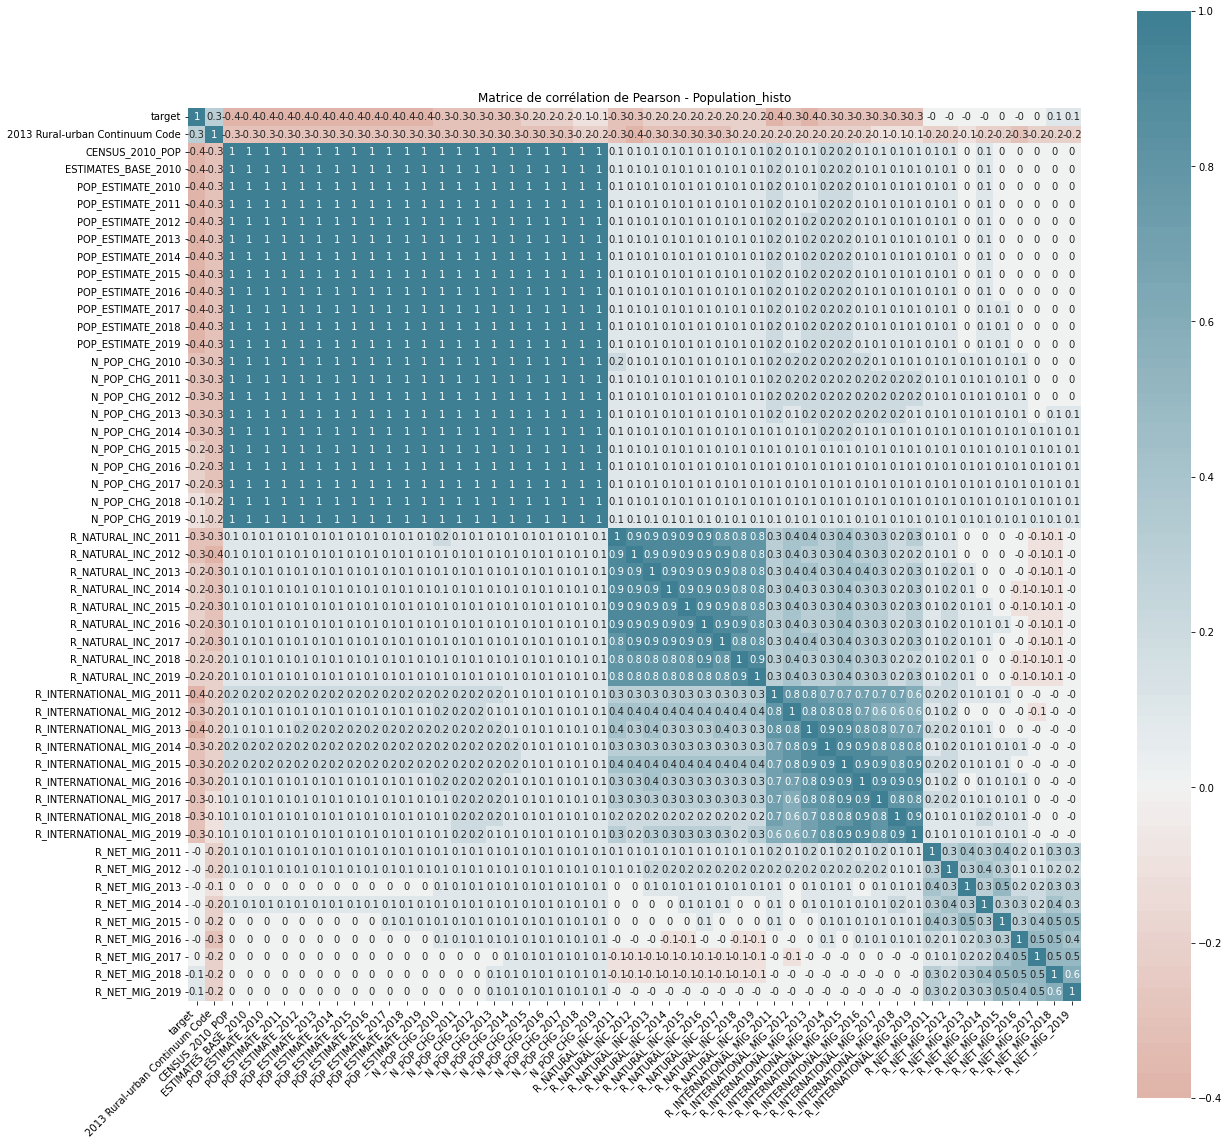

In [171]:
# Matrice de corrélation de Pearson : fichier population - historique 2010 à 2019

matrice_corr = df[["target","2013 Rural-urban Continuum Code","CENSUS_2010_POP","ESTIMATES_BASE_2010","POP_ESTIMATE_2010","POP_ESTIMATE_2011","POP_ESTIMATE_2012","POP_ESTIMATE_2013","POP_ESTIMATE_2014","POP_ESTIMATE_2015","POP_ESTIMATE_2016","POP_ESTIMATE_2017","POP_ESTIMATE_2018","POP_ESTIMATE_2019","N_POP_CHG_2010","N_POP_CHG_2011","N_POP_CHG_2012","N_POP_CHG_2013","N_POP_CHG_2014","N_POP_CHG_2015","N_POP_CHG_2016","N_POP_CHG_2017","N_POP_CHG_2018","N_POP_CHG_2019","R_NATURAL_INC_2011","R_NATURAL_INC_2012","R_NATURAL_INC_2013","R_NATURAL_INC_2014","R_NATURAL_INC_2015","R_NATURAL_INC_2016","R_NATURAL_INC_2017","R_NATURAL_INC_2018","R_NATURAL_INC_2019","R_INTERNATIONAL_MIG_2011","R_INTERNATIONAL_MIG_2012","R_INTERNATIONAL_MIG_2013","R_INTERNATIONAL_MIG_2014","R_INTERNATIONAL_MIG_2015","R_INTERNATIONAL_MIG_2016","R_INTERNATIONAL_MIG_2017","R_INTERNATIONAL_MIG_2018","R_INTERNATIONAL_MIG_2019","R_NET_MIG_2011","R_NET_MIG_2012","R_NET_MIG_2013","R_NET_MIG_2014","R_NET_MIG_2015","R_NET_MIG_2016","R_NET_MIG_2017","R_NET_MIG_2018","R_NET_MIG_2019"]].corr().round(1)
plt.figure(figsize=(20,20))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson - Population_histo")

Toutes les données d'historique pour toutes les variables sont très corrélées entre elles.<br>
Nous conservervons donc les valeurs les plus récentes pour modéliser (2019).

##### <span style="color:#191970">Données totales retenues</span>

Récapitulatif des variables à conserver : <br>

**Global :** "target","2013 Rural-urban Continuum Code"<br>
**Fichier Education :** "Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19", <br>
**Fichier Poverty :** "PCTPOVALL_2019",<br>
**Fichier Unemployment :** "Unemployed_2019","Unemployment_rate_2019","Med_HH_Income_Percent_of_State_Total_2019",<br>
**Fichier population :** "POP_ESTIMATE_2019","N_POP_CHG_2019","R_NATURAL_INC_2019","R_INTERNATIONAL_MIG_2019","R_NET_MIG_2019"


Text(0.5, 1.0, 'Matrice de corrélation de Pearson : tous fichiers')

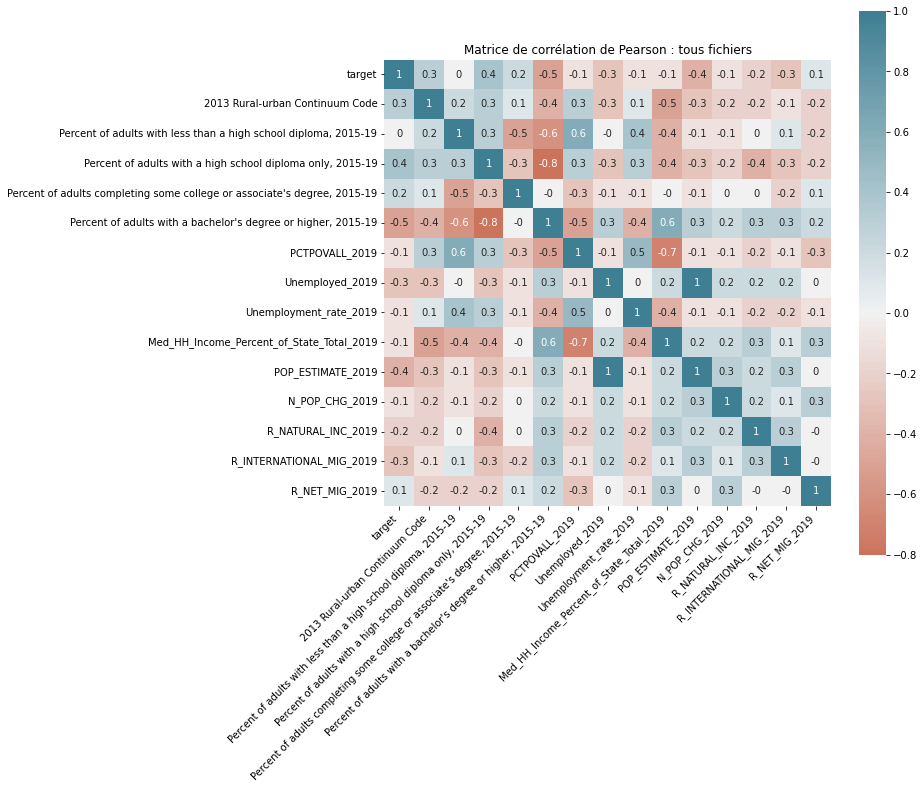

In [181]:
# Matrice de corrélation de Pearson : données totales retenues

matrice_corr = df_target_clean[['target', '2013 Rural-urban Continuum Code', "Percent of adults with less than a high school diploma, 2015-19", 'Percent of adults with a high school diploma only, 2015-19',"Percent of adults completing some college or associate's degree, 2015-19", "Percent of adults with a bachelor's degree or higher, 2015-19", "PCTPOVALL_2019", "Unemployed_2019", 'Unemployment_rate_2019', 'Med_HH_Income_Percent_of_State_Total_2019', 'POP_ESTIMATE_2019','N_POP_CHG_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019']].corr().round(1)
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=matrice_corr, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title("Matrice de corrélation de Pearson : tous fichiers")

Il s'avère que la variable "Unemployed_2019" est corrélée à 1 avec la variable "POP_ESTIMATE_2019". Nous n'allons donc pas la conserver pour la modélisation.

#### <span style="color:#191970">Pairplot</span>

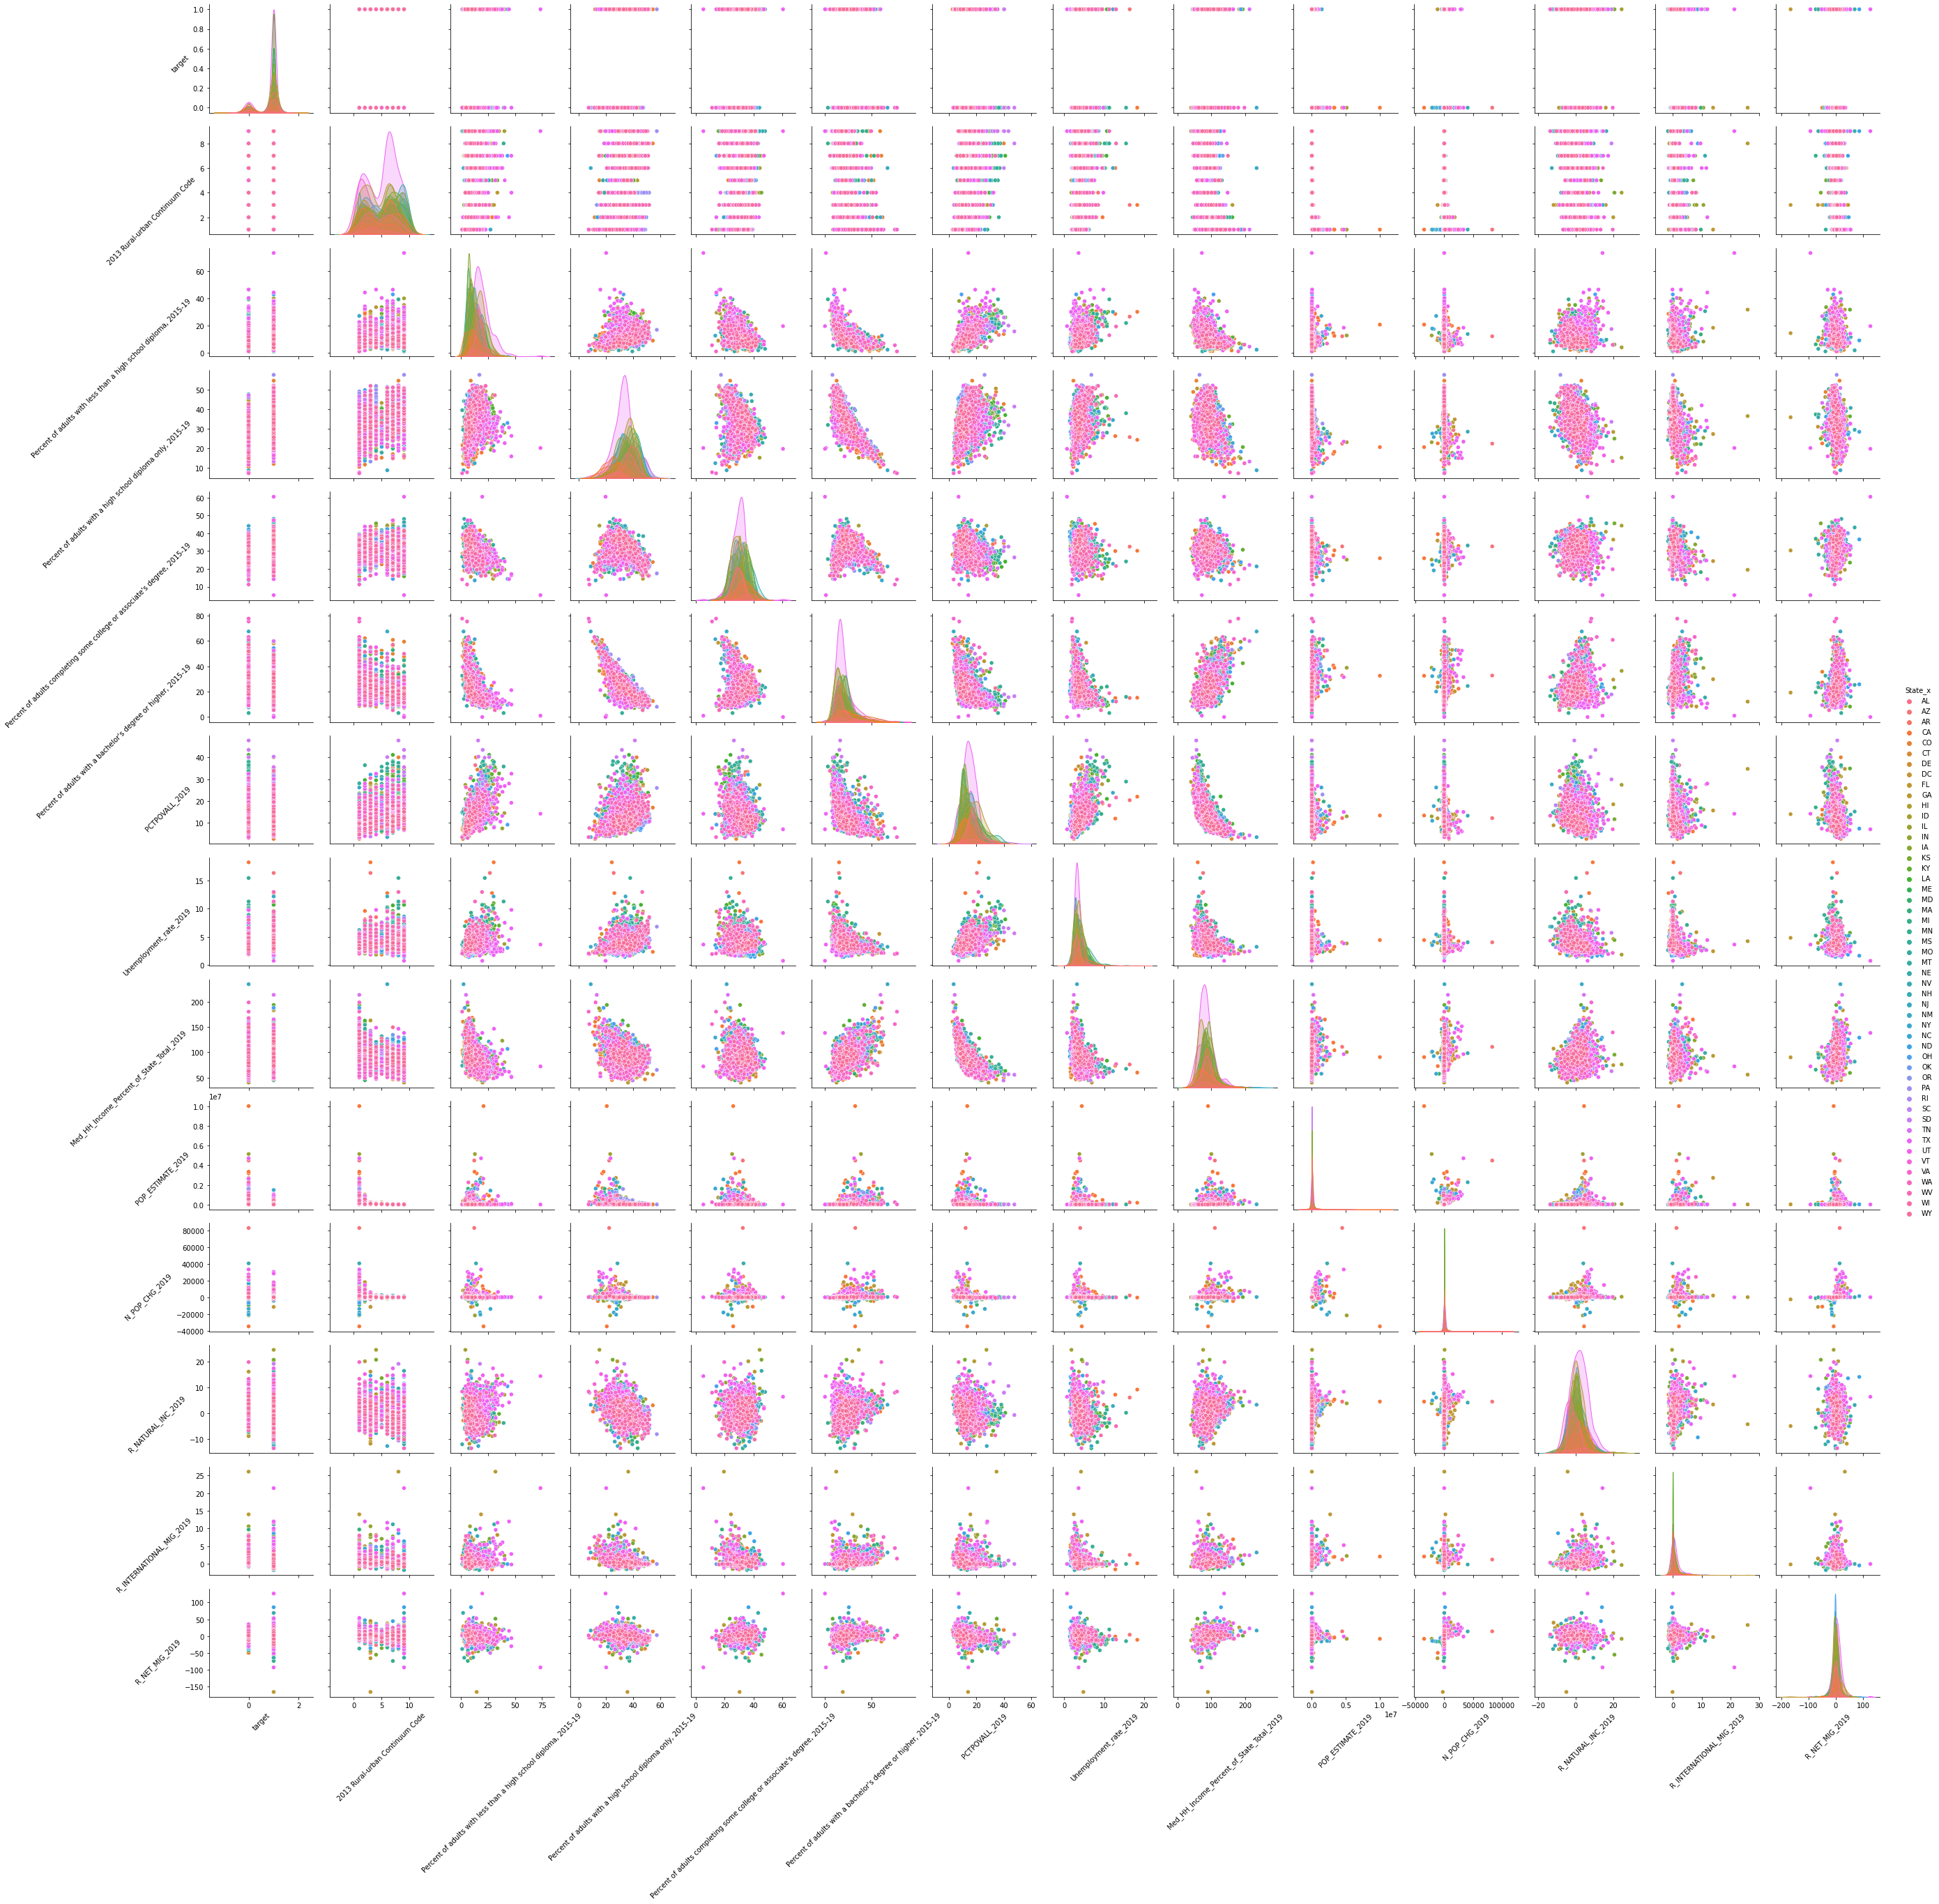

In [188]:
# plairplot
g = sns.pairplot(df_target_clean, vars=['target', '2013 Rural-urban Continuum Code', "Percent of adults with less than a high school diploma, 2015-19", 'Percent of adults with a high school diploma only, 2015-19',"Percent of adults completing some college or associate's degree, 2015-19", "Percent of adults with a bachelor's degree or higher, 2015-19", "PCTPOVALL_2019", 'Unemployment_rate_2019', 'Med_HH_Income_Percent_of_State_Total_2019', 'POP_ESTIMATE_2019','N_POP_CHG_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019', 'R_NET_MIG_2019'], hue="State_x")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

#### <span style="color:#191970">Export CSV df final pour modélisation</span>

In [177]:
df_target_clean.columns

Index(['FIPS Code', 'State_x', 'Area name', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOVALL_2019', 'CI90LBALLP_2019', 'CI90UBALLP_2019',
       'PCTPOV017_2019', 'CI90LB017P_2019', 'CI90UB017P_2019',
       'PCTPOV517_2019', 'CI90LB517P_2019', 'CI90UB517P_2019',
       'CI90LBINC_2019', 'CI90UBINC_2019', 'Metro_2013',
       'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019',
       'Unemployment_rate_2019', 'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019', 'Economic_typology_2015',
       'POP_ESTIMATE_2019', 'N_POP_CHG_2019', 'RESIDUAL_2019',
       'GQ_ESTIMATES_2019', 'R_birth_2019', 'R_death_2019',
   

In [178]:
# Dataframe final avec variables retenues pour la modélisation

df_target_clean_drop = ['2013 Urban Influence Code', 'CI90LBALLP_2019', 'CI90UBALLP_2019', 'PCTPOV017_2019', 'CI90LB017P_2019', 'CI90UB017P_2019','PCTPOV517_2019', 'CI90LB517P_2019', 
                        'CI90UB517P_2019', 'CI90LBINC_2019', 'CI90UBINC_2019', 'Metro_2013', 'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019', 'Median_Household_Income_2019', 
                        'Economic_typology_2015','RESIDUAL_2019', 'GQ_ESTIMATES_2019', 'R_birth_2019', 'R_death_2019','R_DOMESTIC_MIG_2019']

df_model = df_target_clean.drop(columns=df_target_clean_drop, axis=1)

In [179]:
df_model.columns

Index(['FIPS Code', 'State_x', 'Area name', '2013 Rural-urban Continuum Code',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOVALL_2019', 'Unemployment_rate_2019',
       'Med_HH_Income_Percent_of_State_Total_2019', 'POP_ESTIMATE_2019',
       'N_POP_CHG_2019', 'R_NATURAL_INC_2019', 'R_INTERNATIONAL_MIG_2019',
       'R_NET_MIG_2019', 'target'],
      dtype='object')

In [ ]:
df_model.to_csv('./df_model.csv', index=False)